Examine the values in the Age column:  /n count    1255.000000
mean       32.081764
std         7.273845
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64 



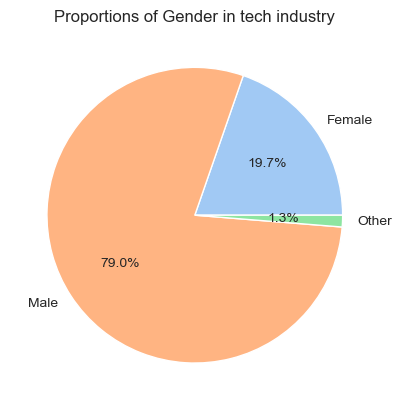

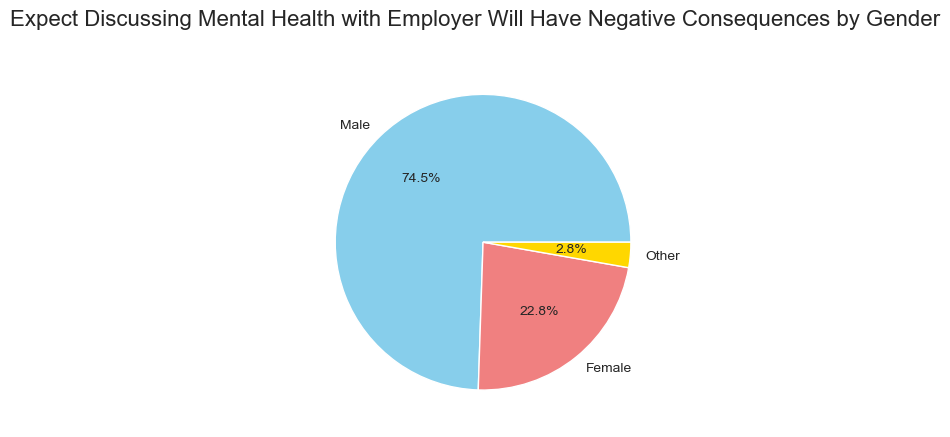

Characteristices of the data in the mental health consequence column:  
 count     1255
unique       3
top         No
freq       489
Name: mental health consequence, dtype: object 



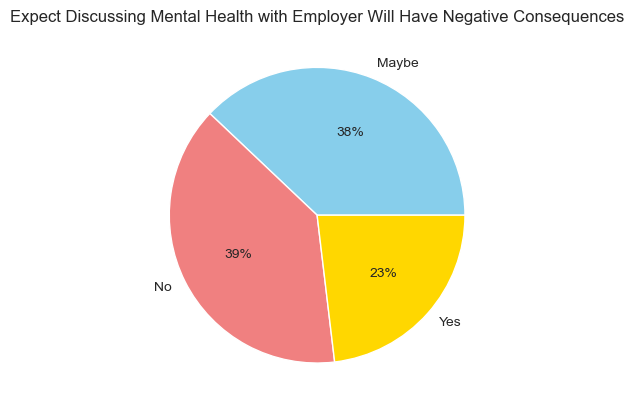

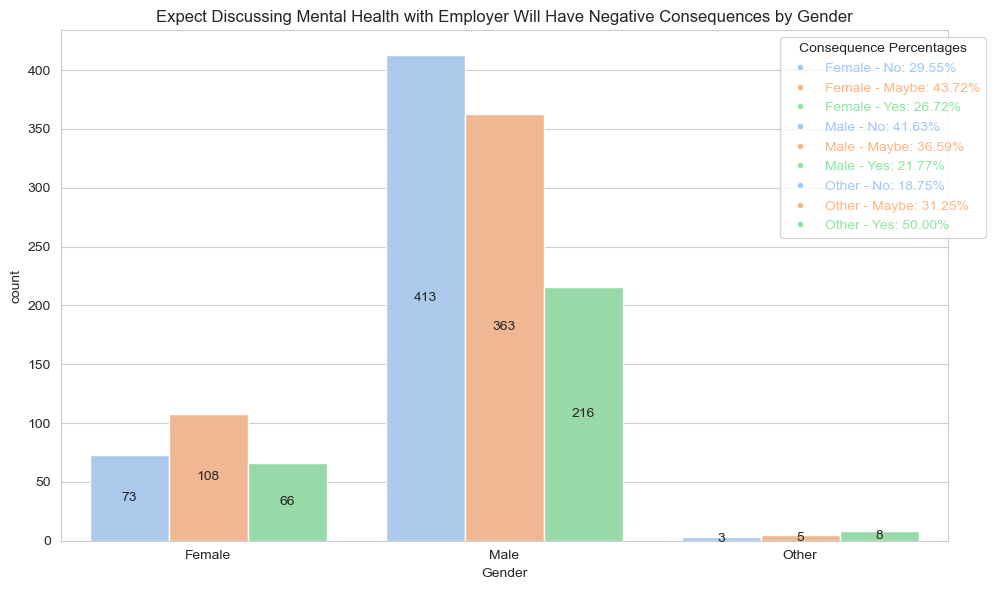

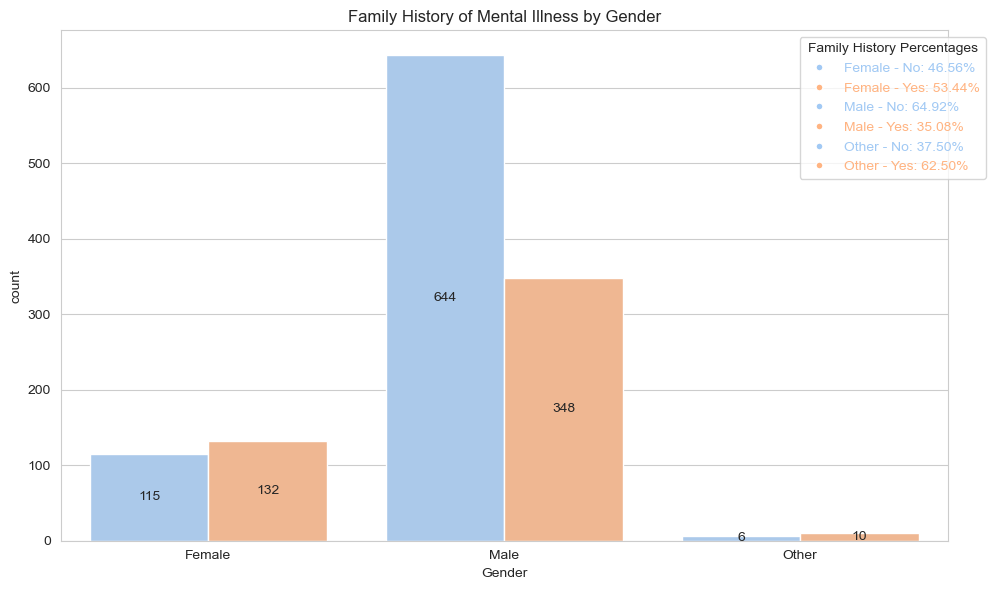

<Figure size 1200x800 with 0 Axes>

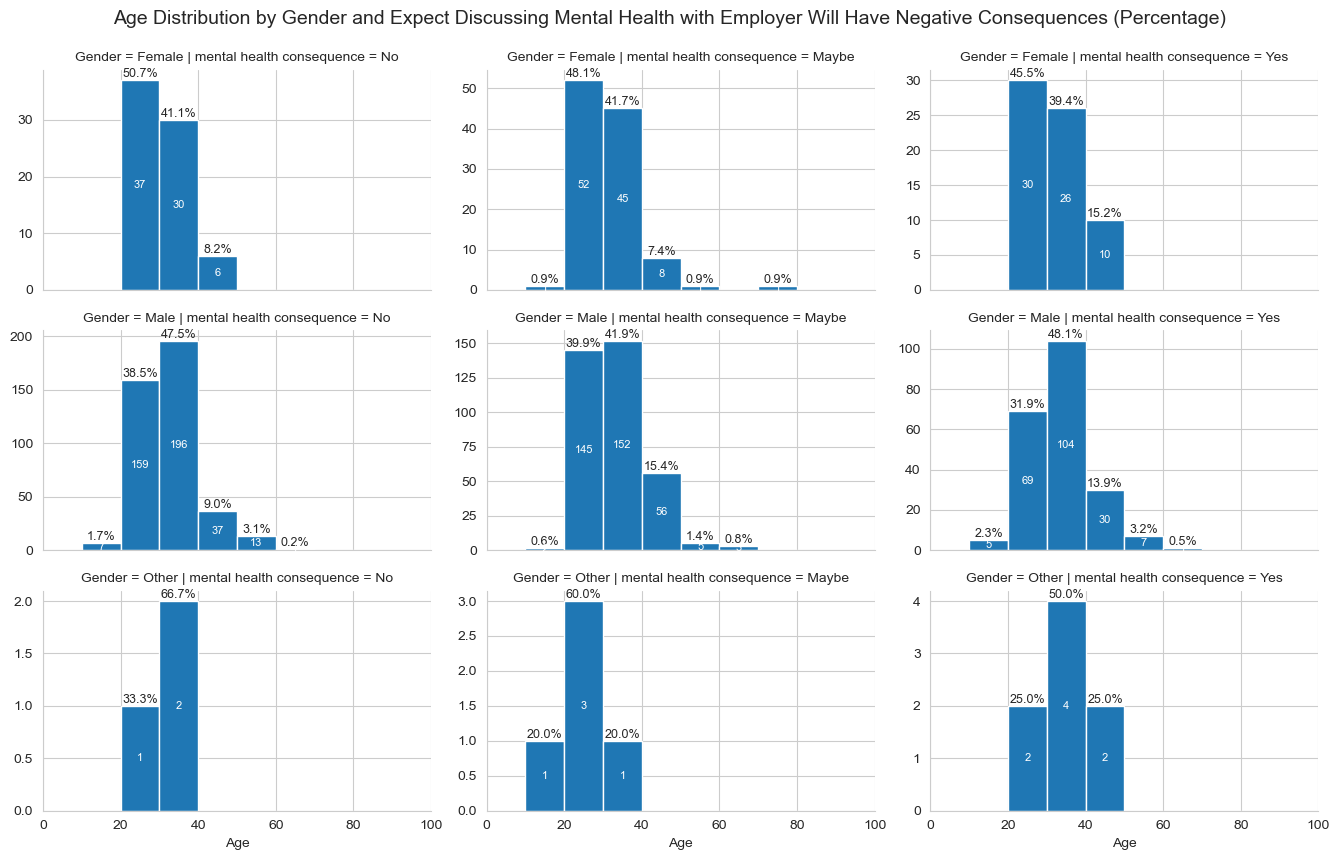

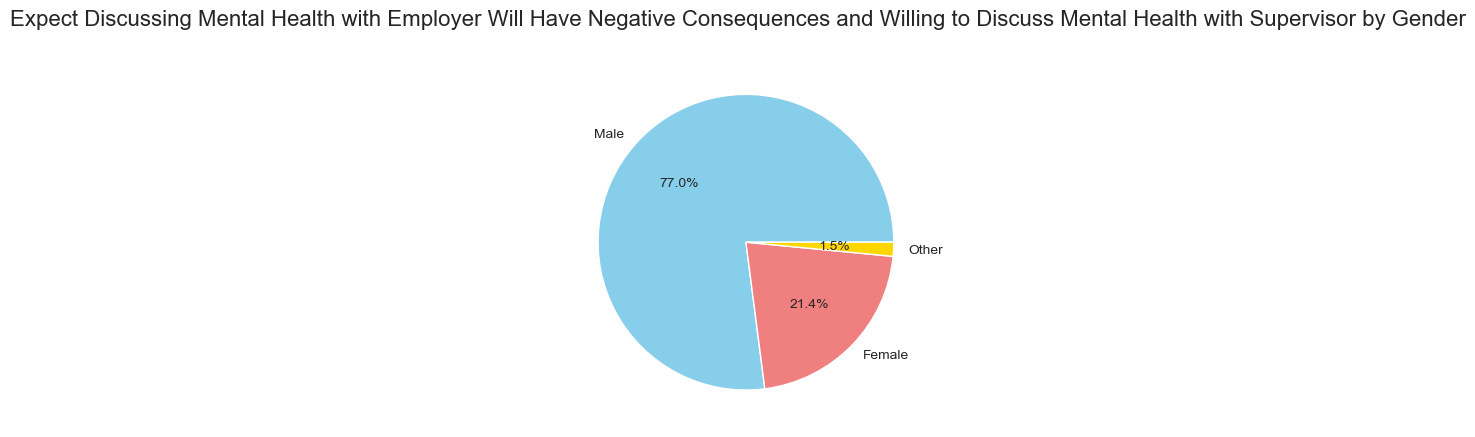

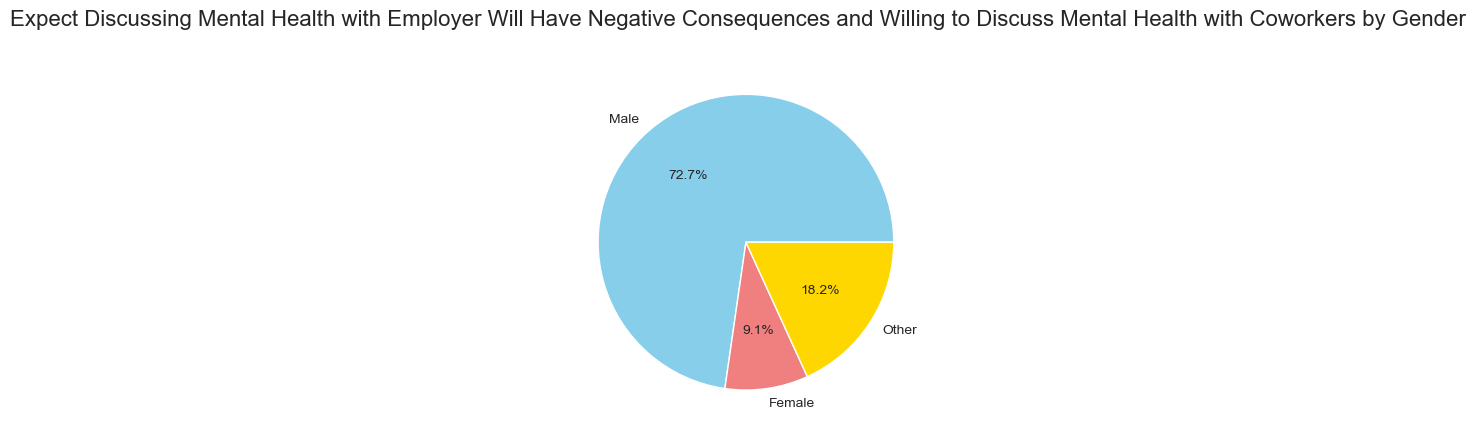

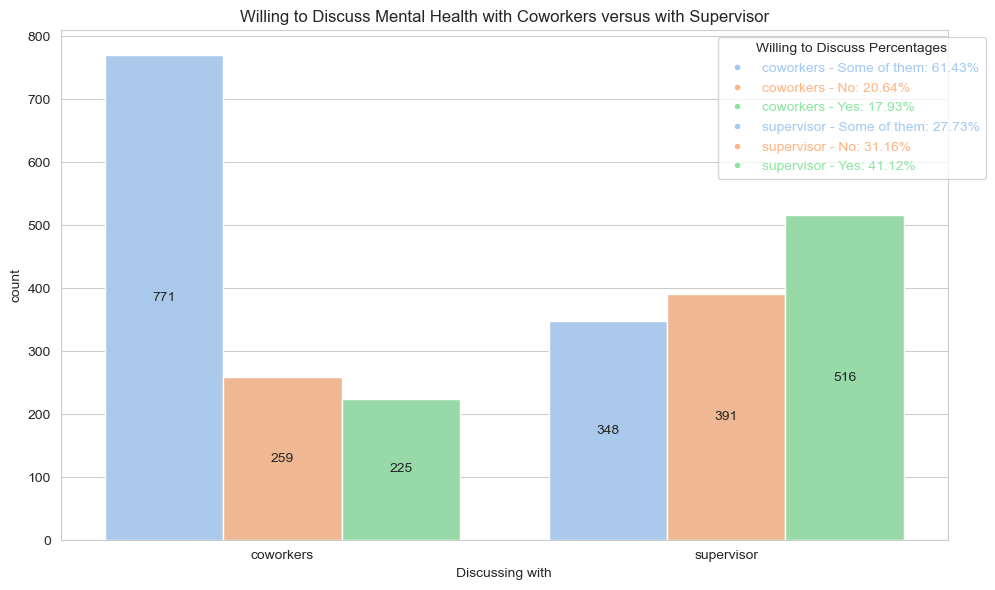

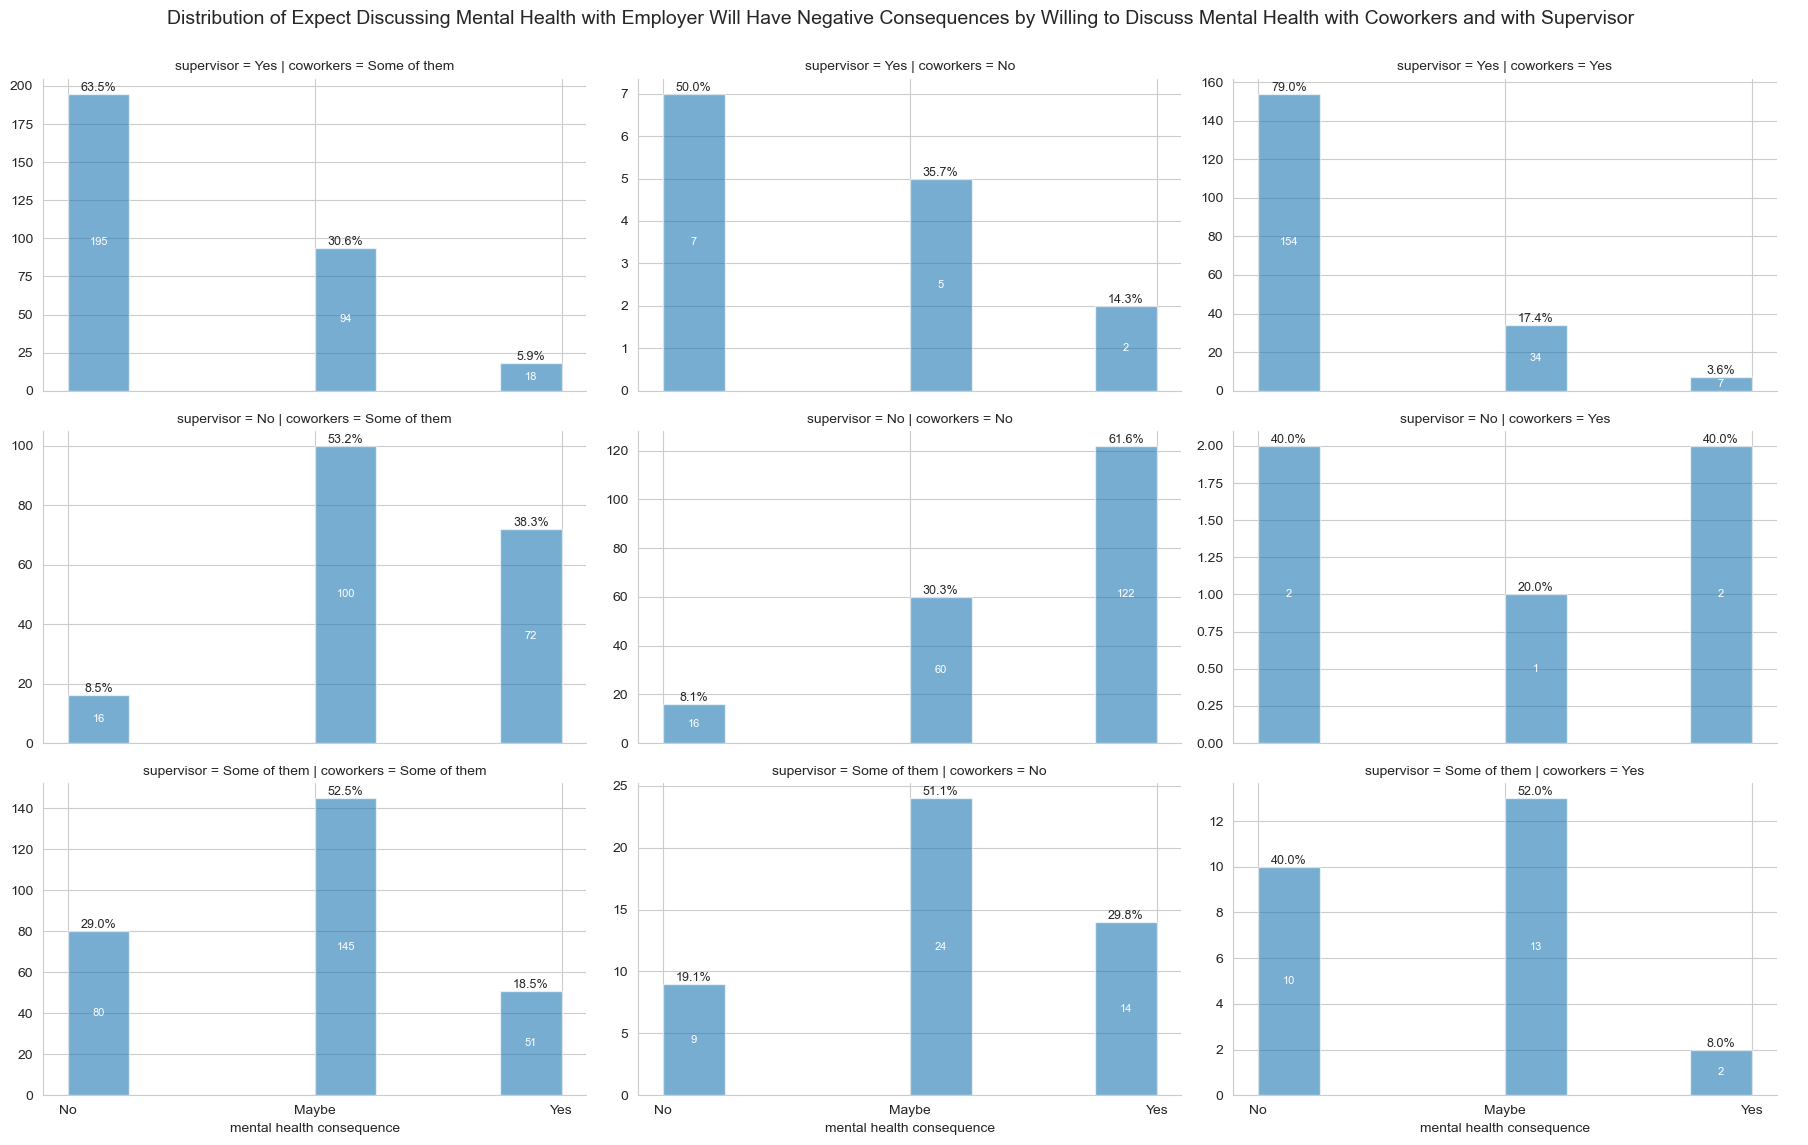

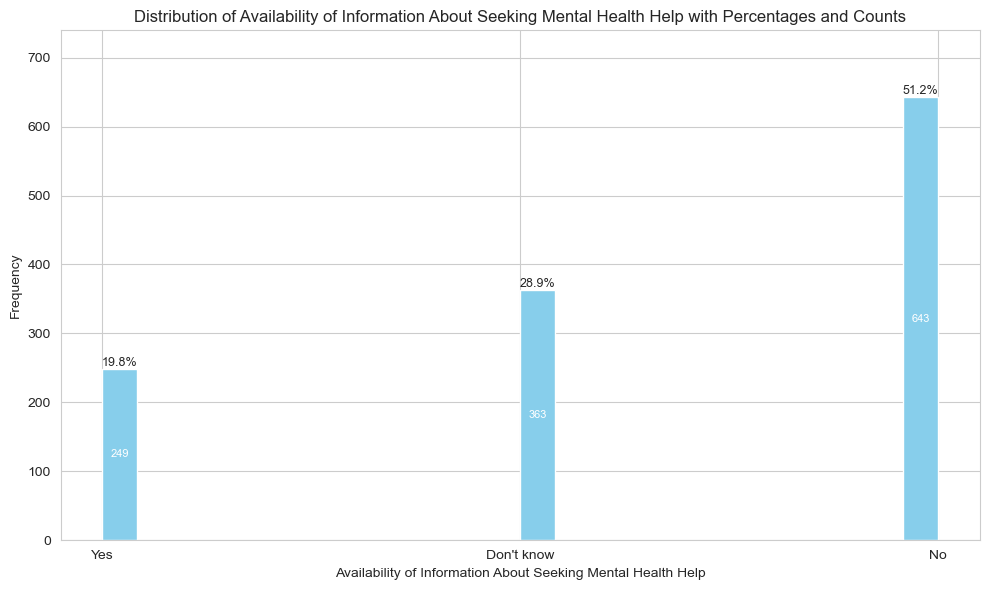

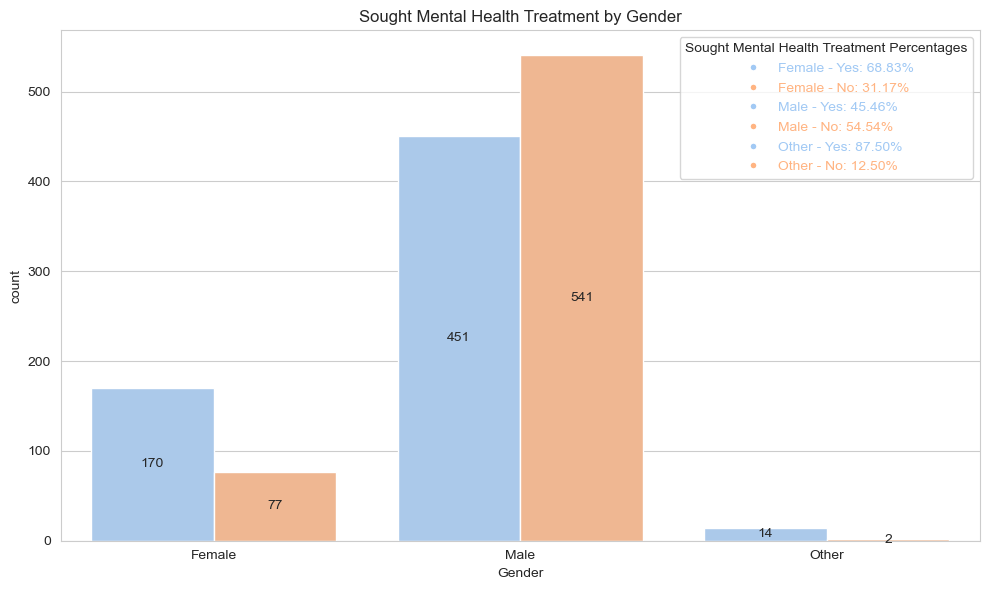

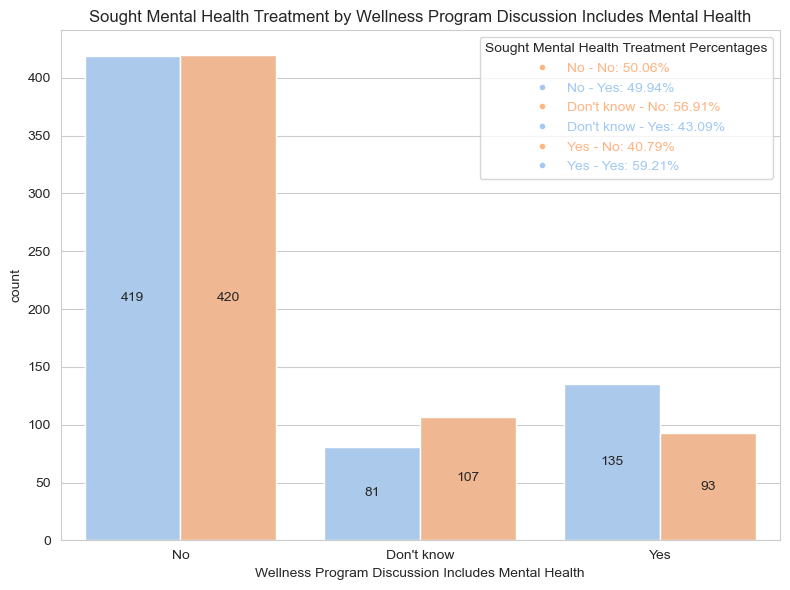

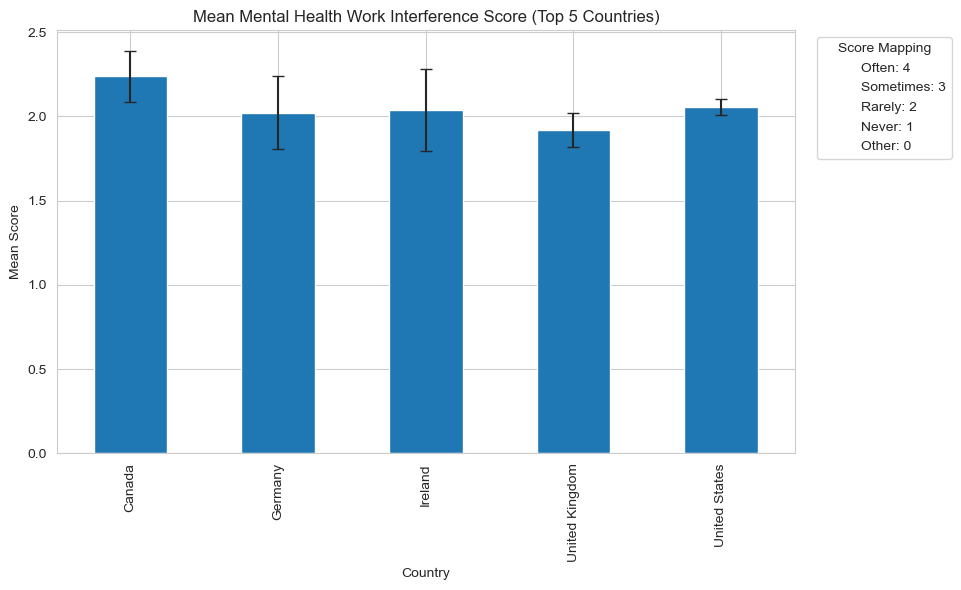

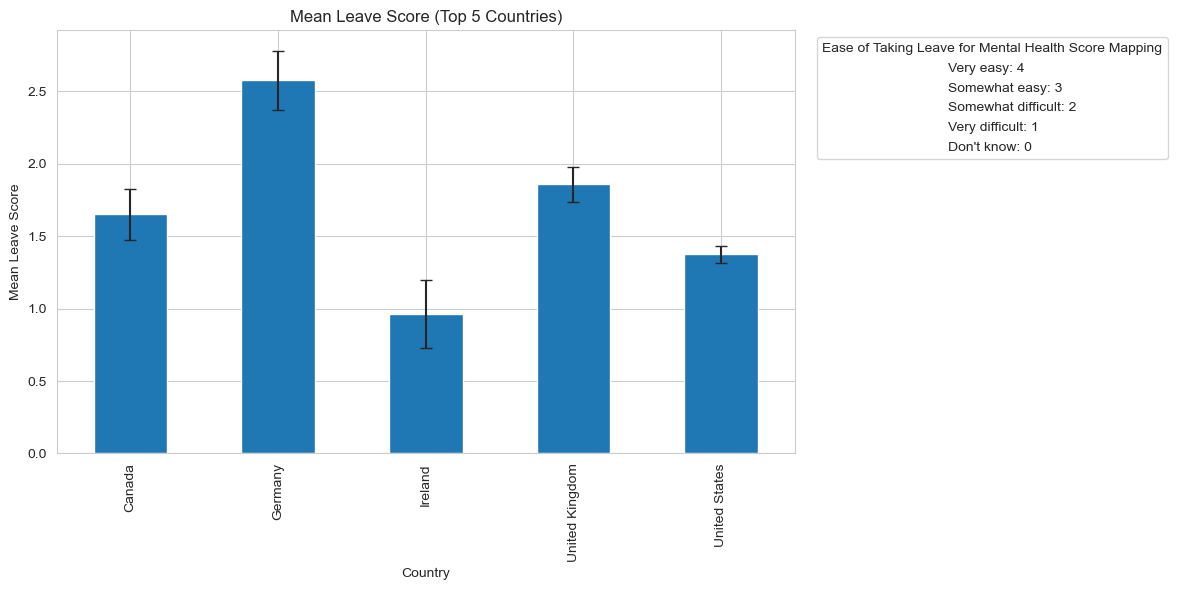

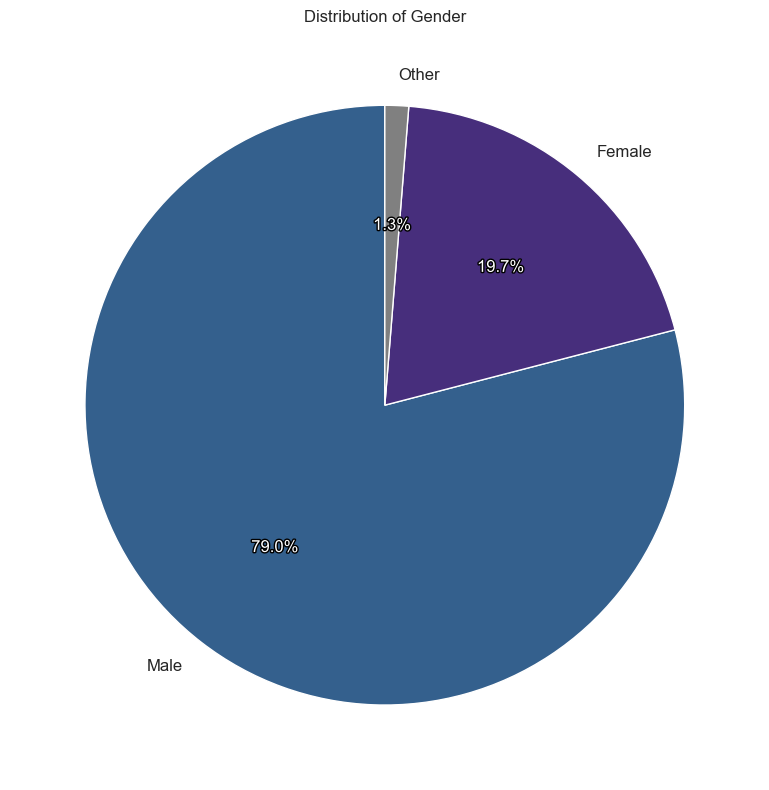

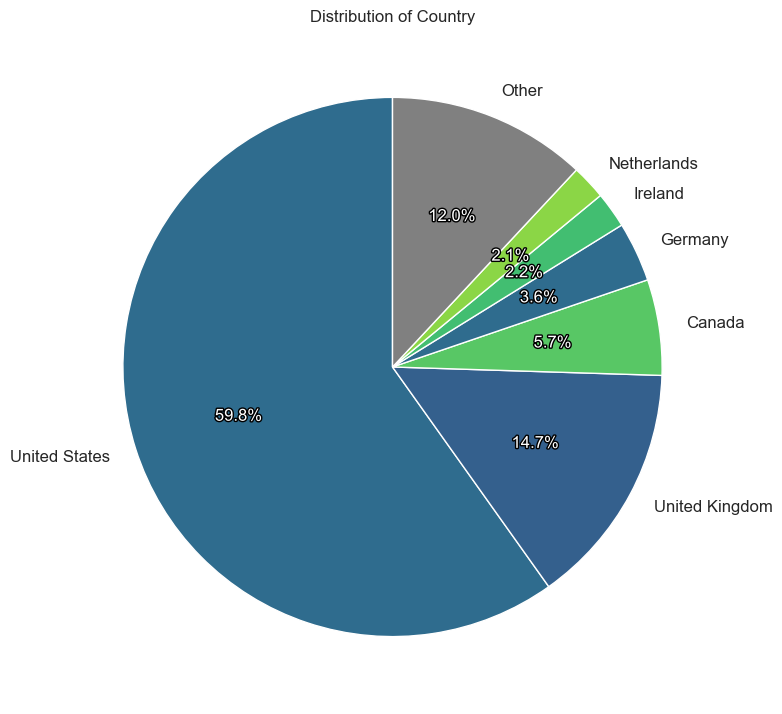

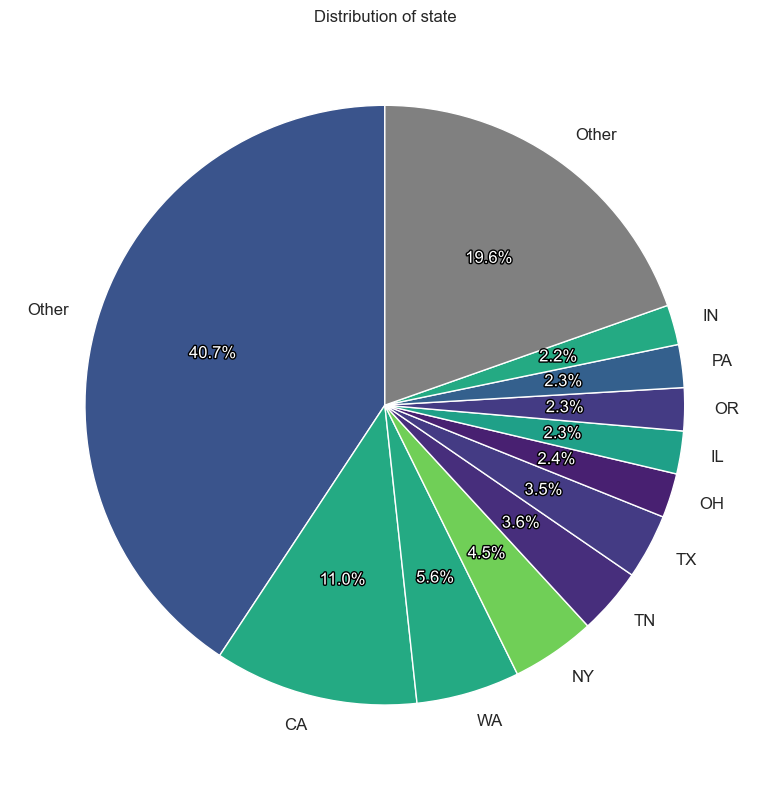

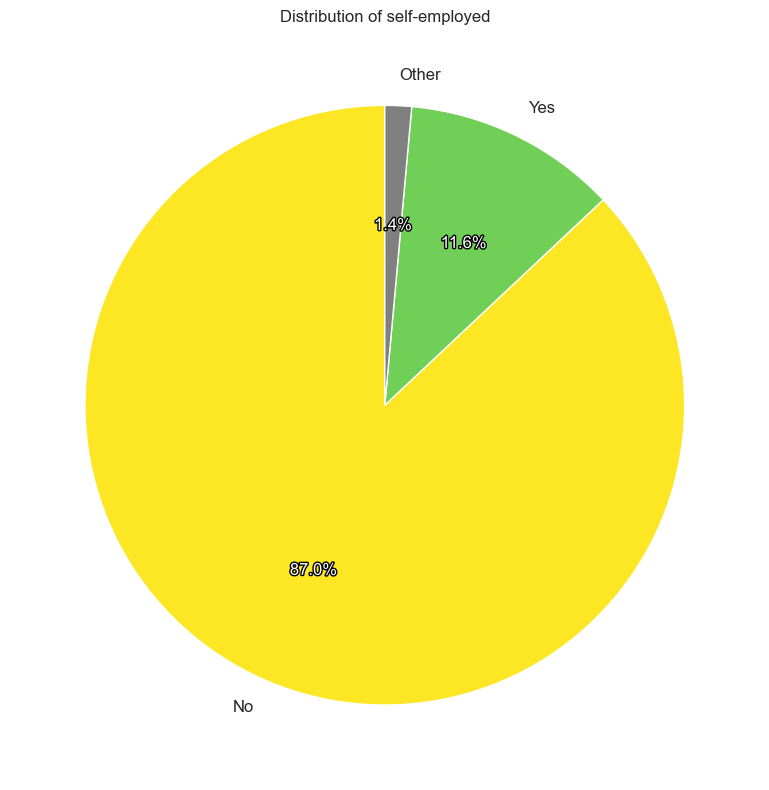

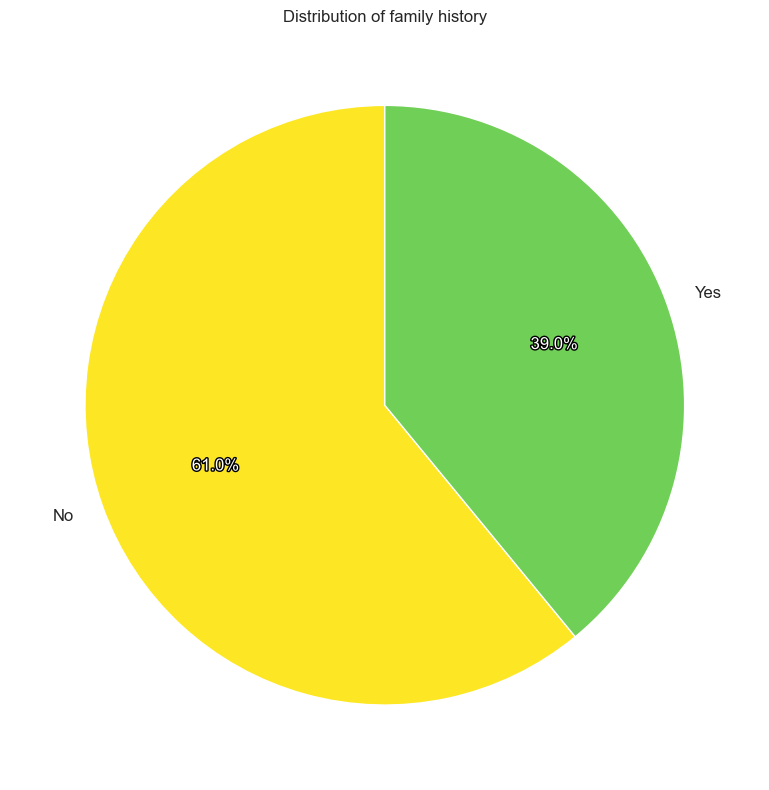

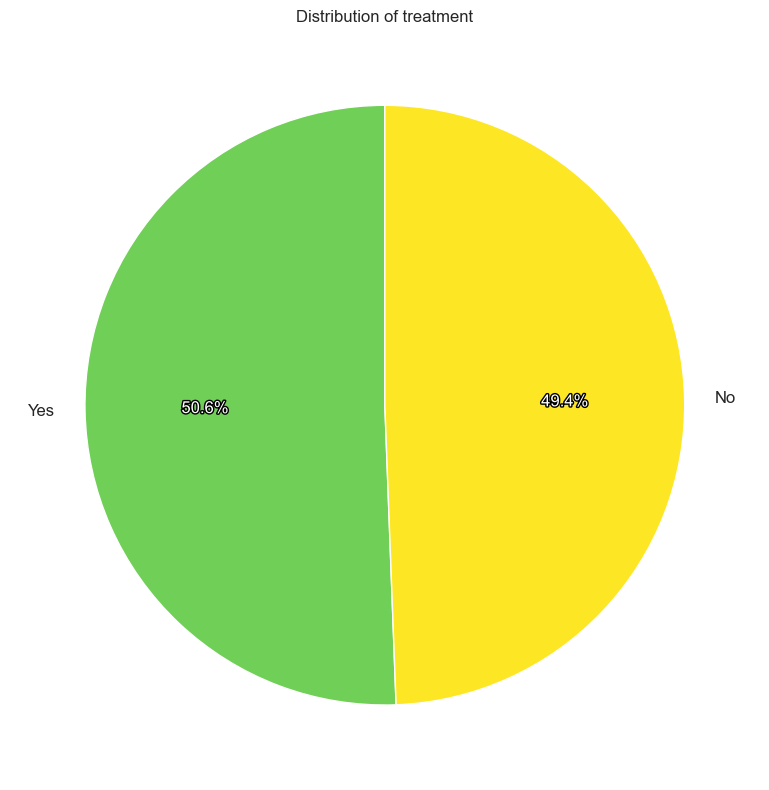

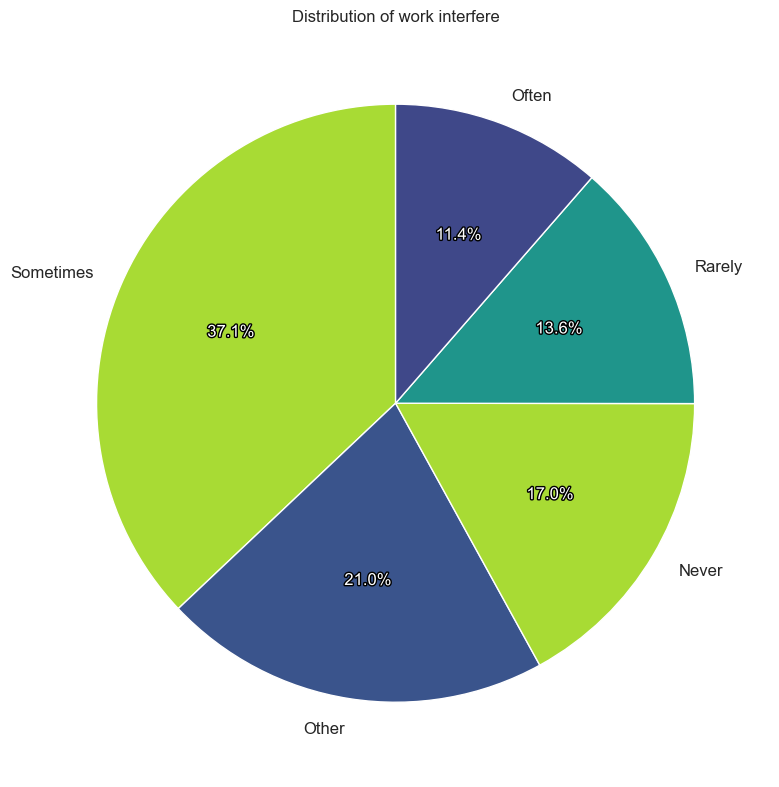

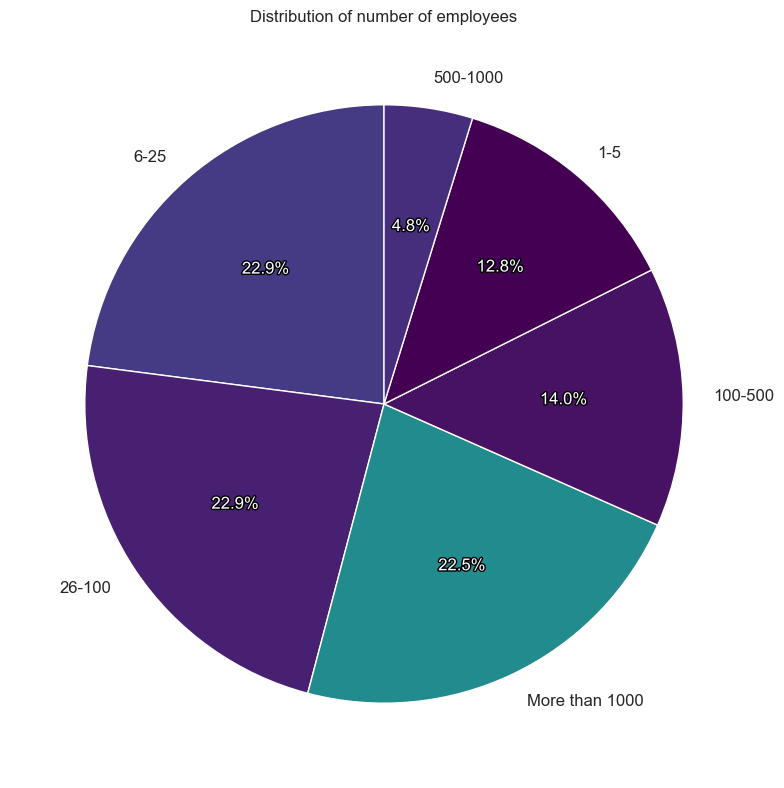

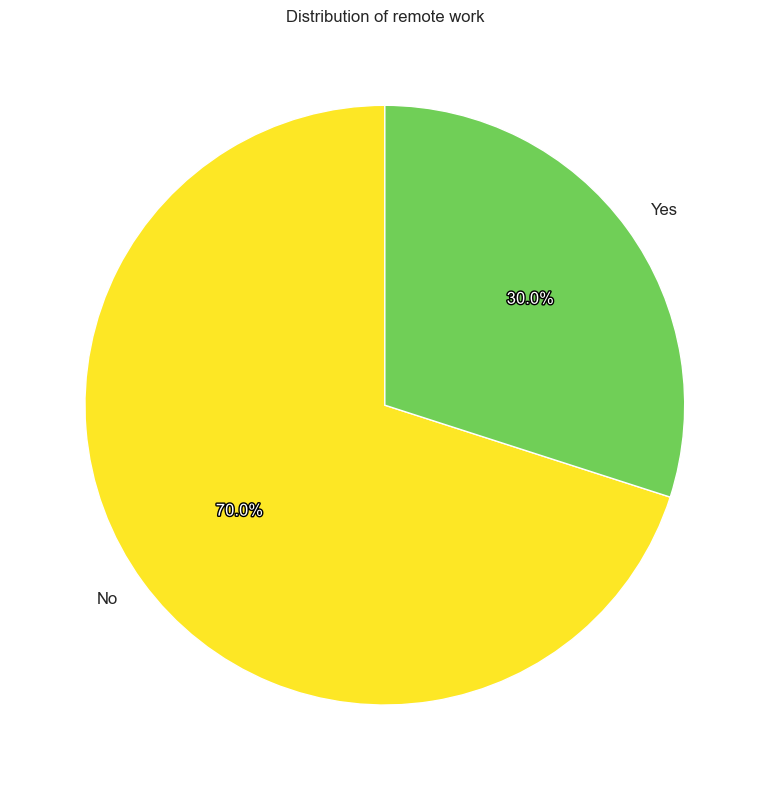

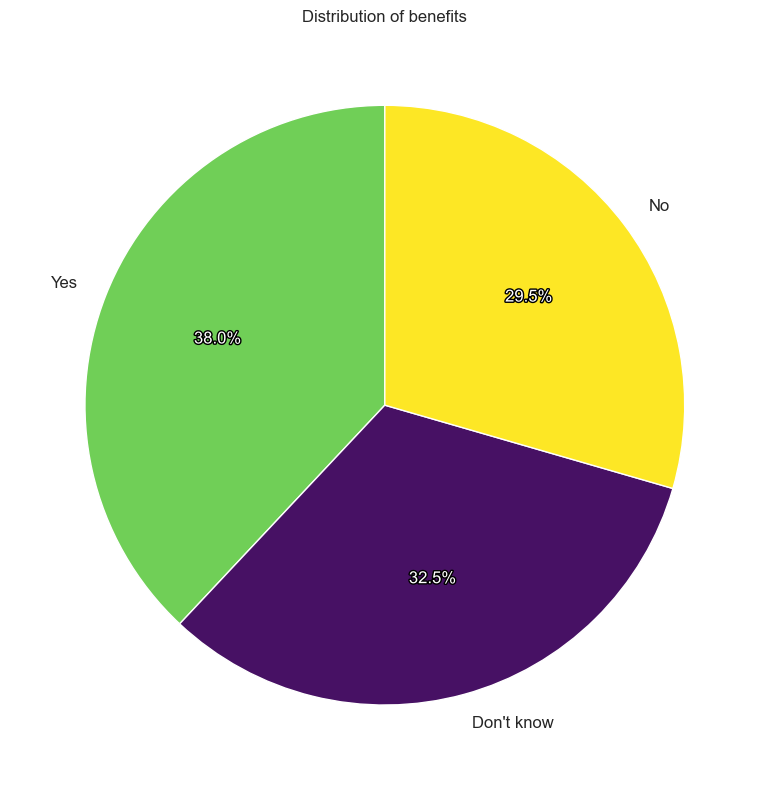

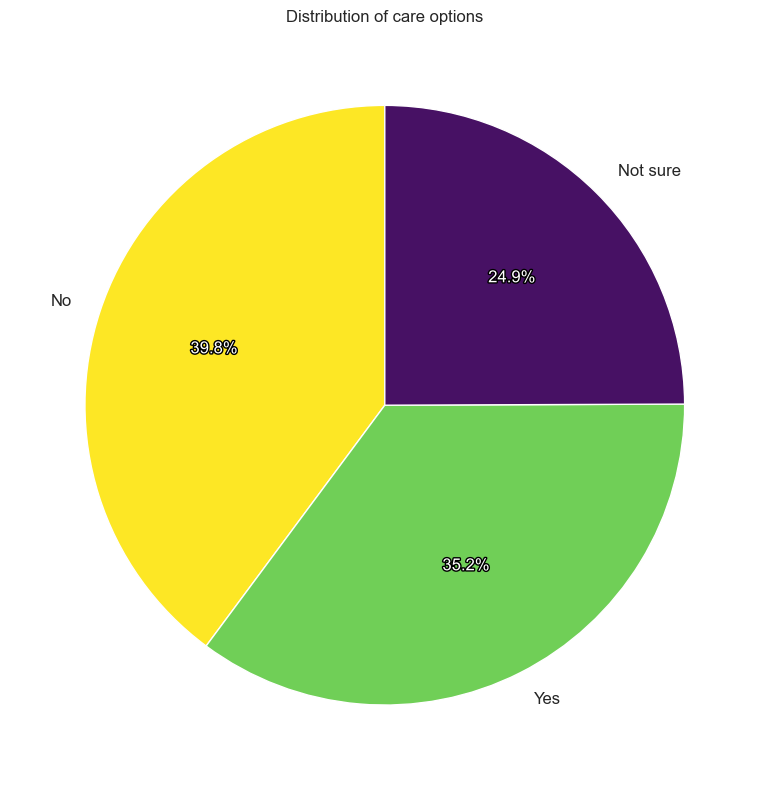

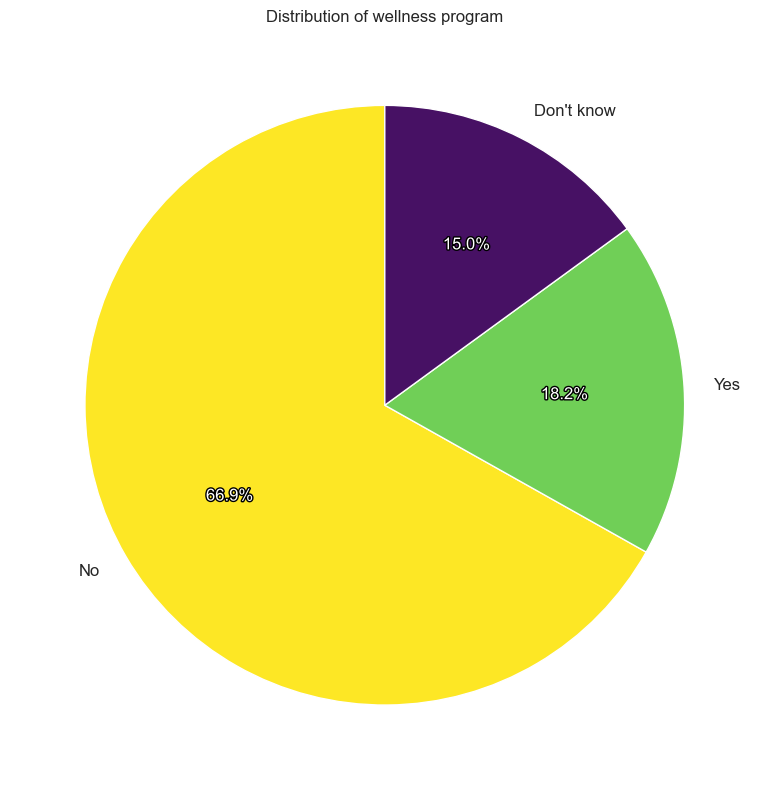

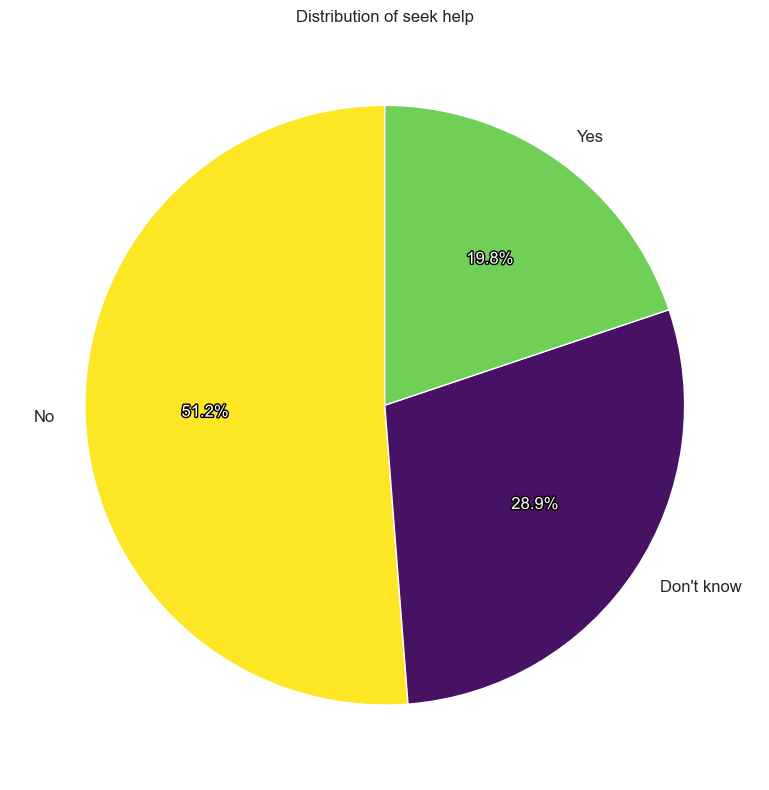

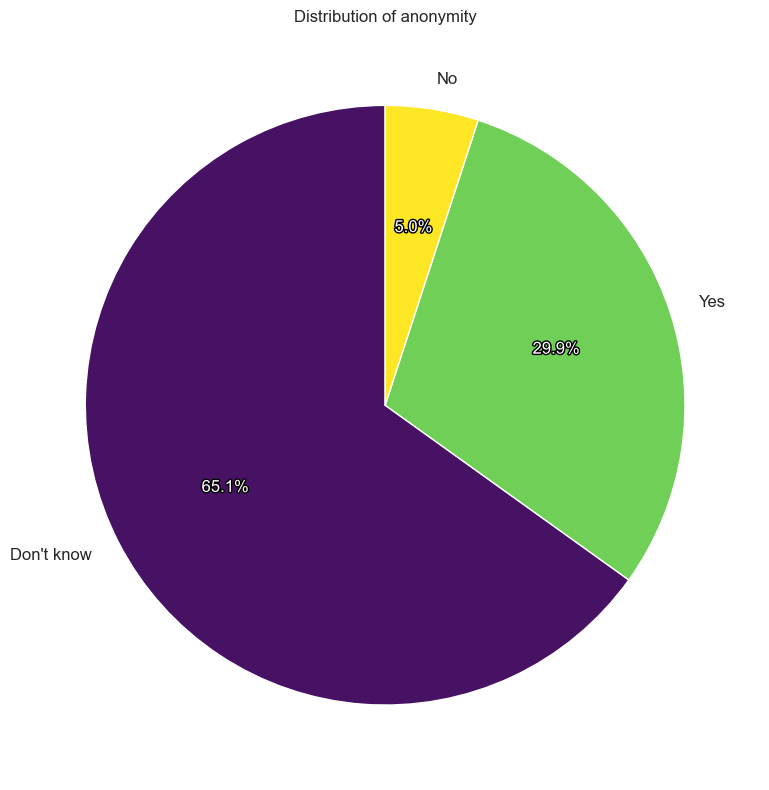

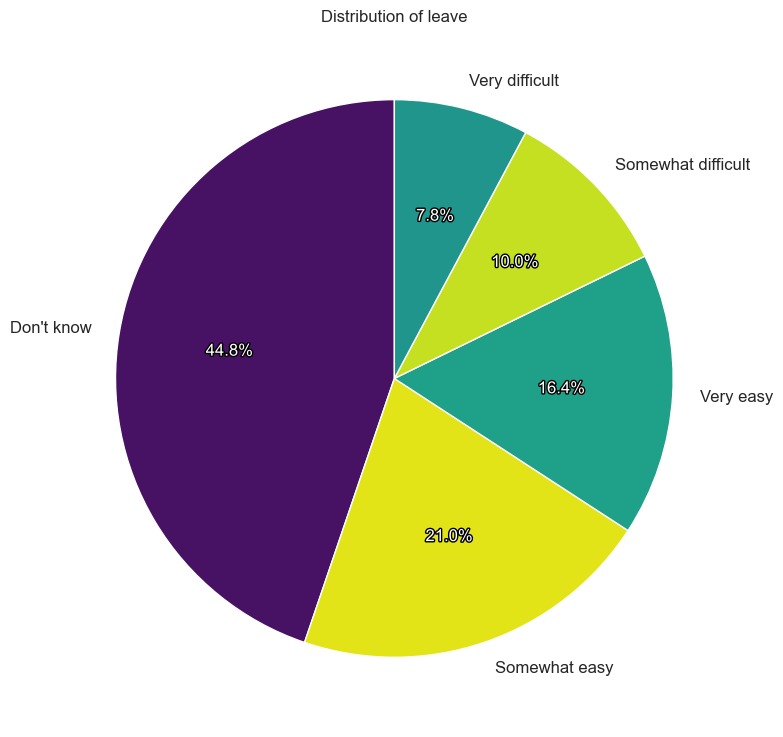

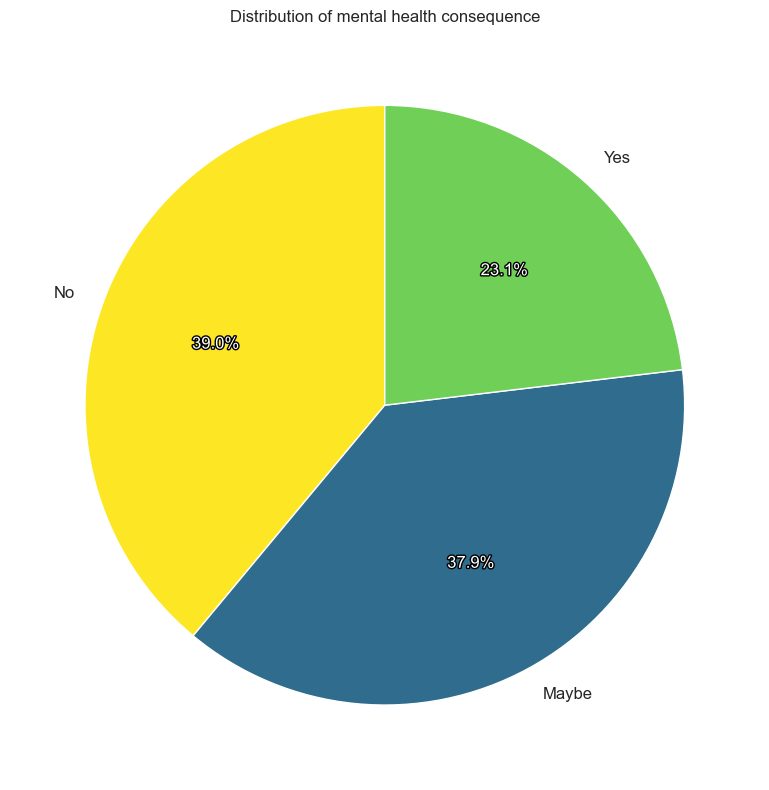

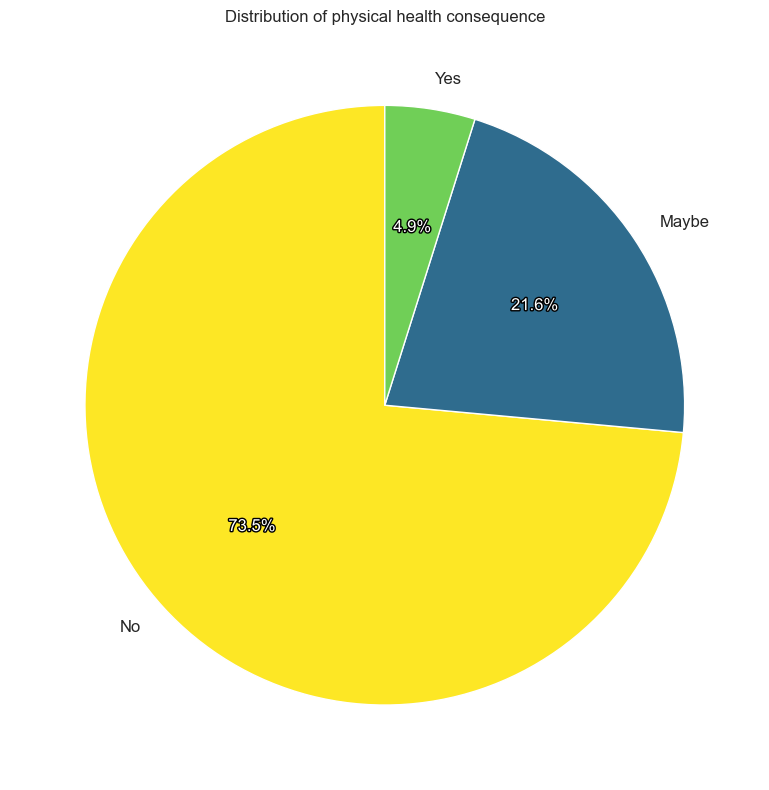

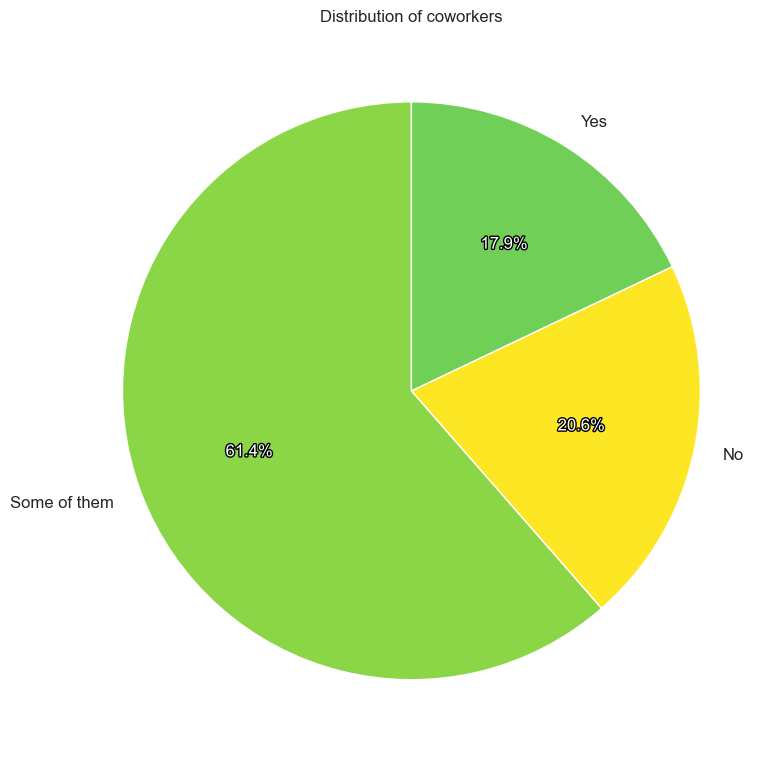

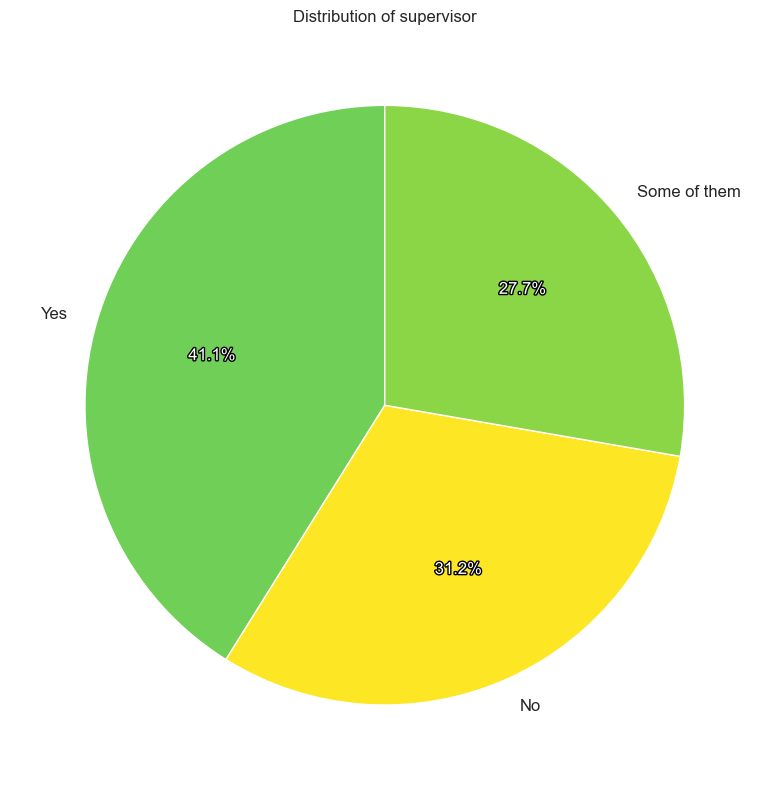

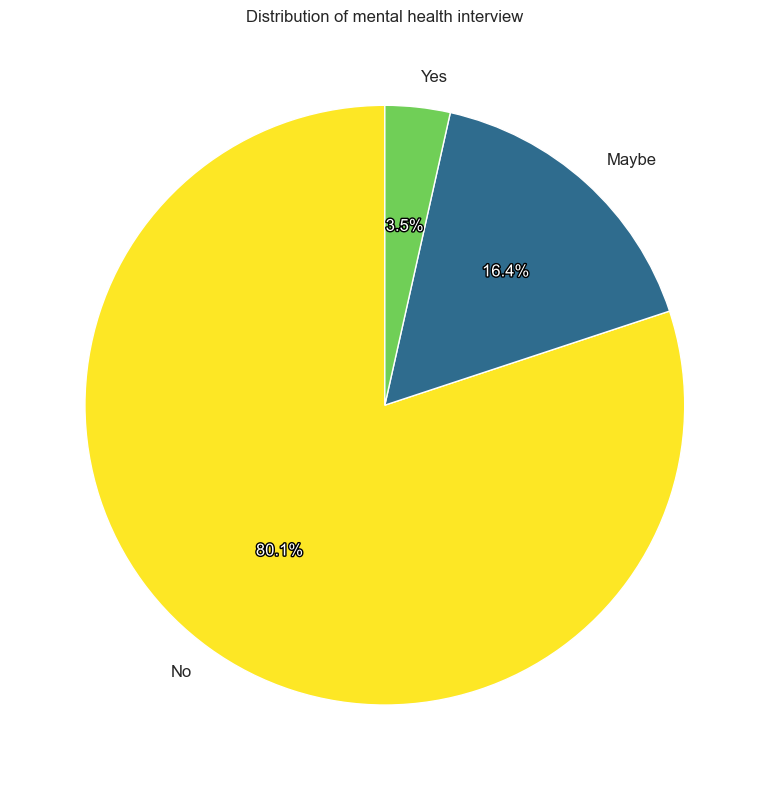

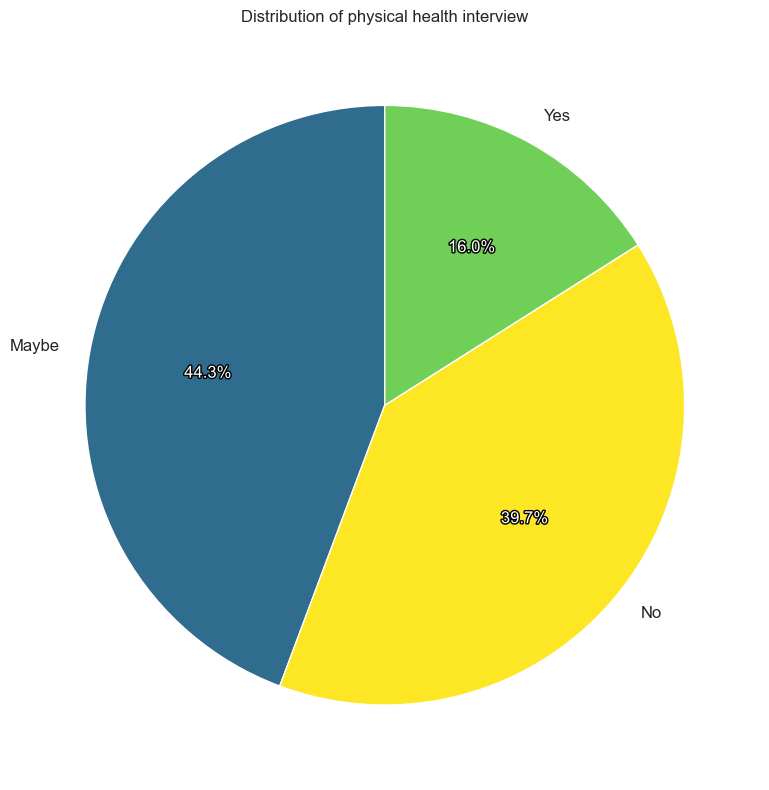

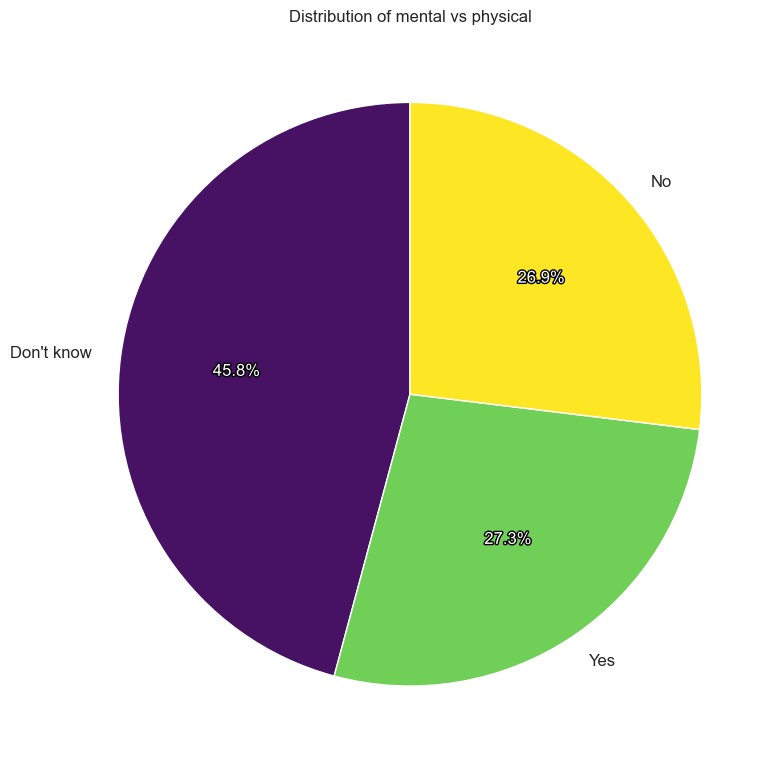

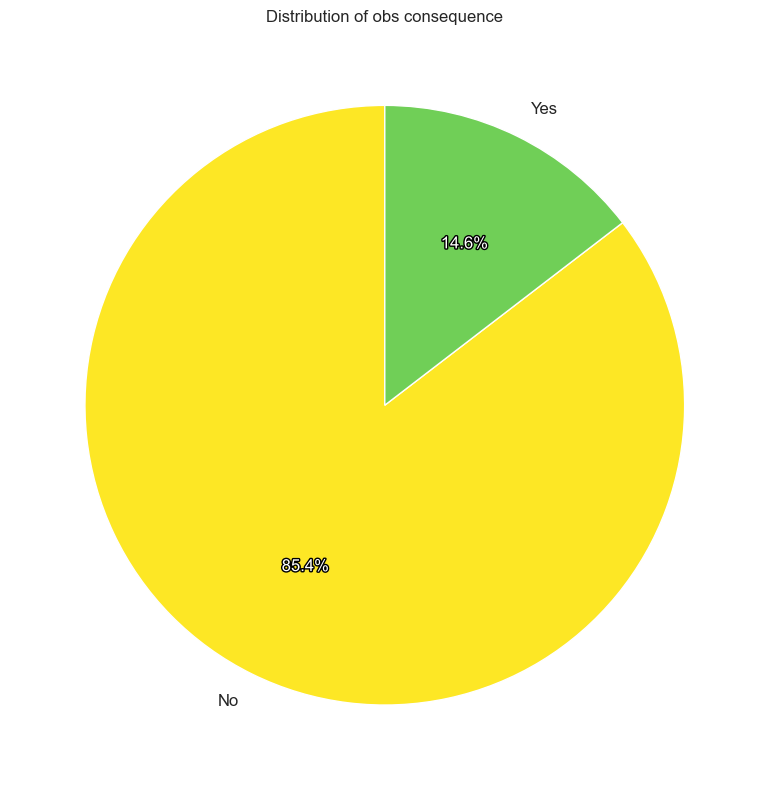

Shape of a new dataframe formed by dropping the first column of the original dataframe:  (1255, 138) 

Columns of a new dataframe formed by dropping the first column of the original dataframe:  
 Index(['Age', 'Gender_Male', 'Gender_Other', 'Country_Austria',
       'Country_Bahamas, The', 'Country_Belgium',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada',
       ...
       'coworkers_Yes', 'supervisor_Some of them', 'supervisor_Yes',
       'mental health interview_No', 'mental health interview_Yes',
       'physical health interview_No', 'physical health interview_Yes',
       'mental vs physical_No', 'mental vs physical_Yes',
       'obs consequence_Yes'],
      dtype='object', length=138) 

Feature Scores: 
 Gender_Male: 0.992611
 Gender_Other: 6.512417
 Country_Austria: 0.901554
 Country_Bahamas, The: 3.327586
 Country_Belgium: 0.353106
 Country_Bosnia and Herzegovina: 0.300518
 Country_Brazil: 1.803109
 Country_Bulgaria: 0.00

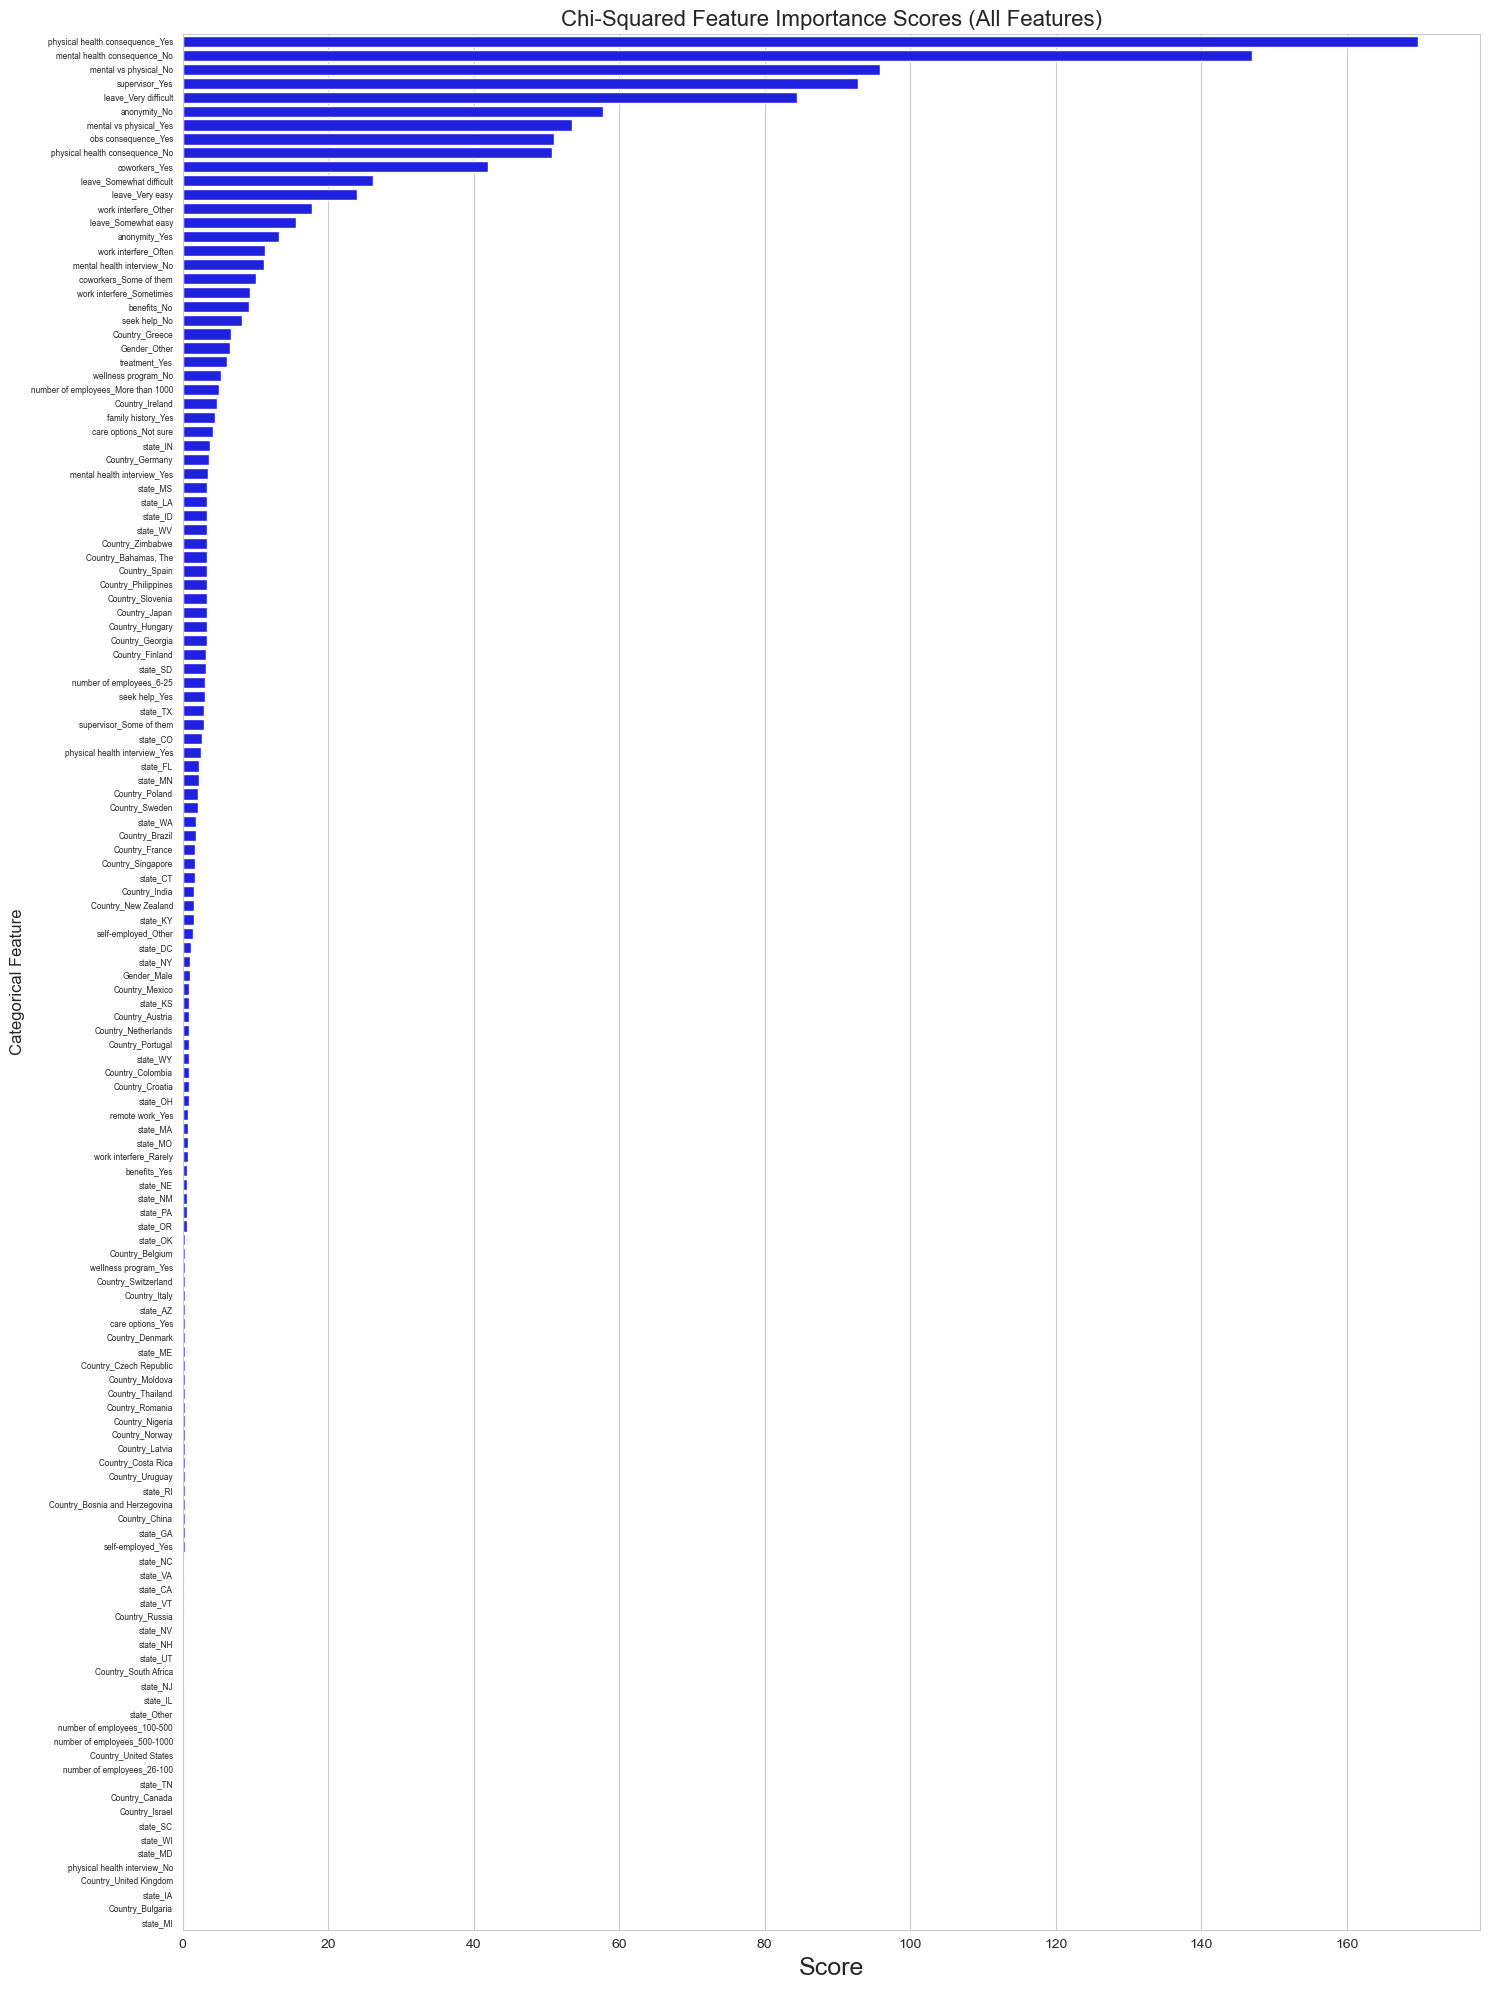

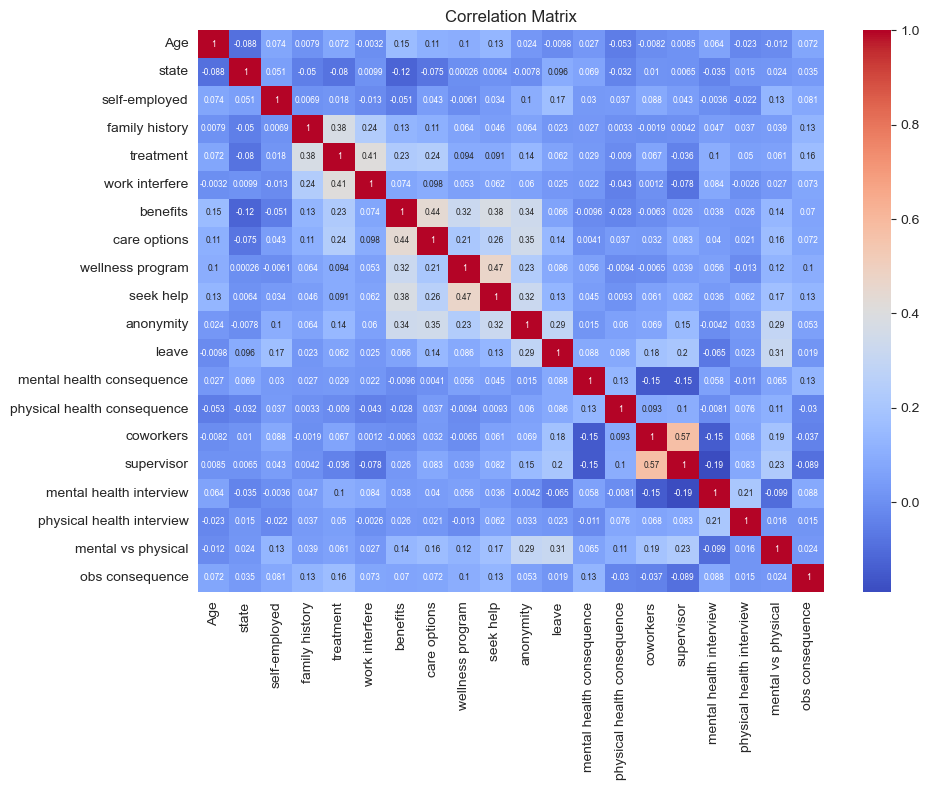

Column Pairs with Correlation Coefficients Greater than 0.33 

[('family history', 'treatment'), ('treatment', 'family history'), ('treatment', 'work interfere'), ('work interfere', 'treatment'), ('benefits', 'care options'), ('benefits', 'seek help'), ('benefits', 'anonymity'), ('care options', 'benefits'), ('care options', 'anonymity'), ('wellness program', 'seek help'), ('seek help', 'benefits'), ('seek help', 'wellness program'), ('anonymity', 'benefits'), ('anonymity', 'care options'), ('coworkers', 'supervisor'), ('supervisor', 'coworkers')] 
 

List of Unique Columns Contained in the List of Correlated Column Pairs 

family history
supervisor
wellness program
treatment
benefits
anonymity
care options
work interfere
seek help
coworkers

 

Lasso Model Feature Importances


,Feature,Importance
4,treatment,12.177656
0,const,3.301480
2,supervisor,0.102741
1,family history,0.000000
3,wellness program,0.000000
5,benefits,0.000000
6,anonymity,0.000000
7,care options,0.000000
8,work interfere,0.000000
9,seek help,0.000000



 

Optimization terminated successfully.
         Current function value: 0.692415
         Iterations 3
Results of regression analysis:  
                            Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1255
Model:                          Logit   Df Residuals:                     1253
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:               0.0009527
Time:                        12:17:45   Log-Likelihood:                -868.98
converged:                       True   LL-Null:                       -869.81
Covariance Type:            nonrobust   LLR p-value:                    0.1980
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1187      0.093      1.278      0.201      -0.063   

In [2]:
# Dependencies
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import plotly.express as px  # For interactive map
import matplotlib.patheffects as path_effects  # Import for text effects
from IPython.display import display  # For nice printing of dataframes
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


##### Input cleaned data

try:
    data_df = pd.read_csv('cleaned_data_df.csv')  # Load from CSV
except FileNotFoundError:
    print("Error: File 'cleaned_data_df.csv' not found.")
except Exception as e:
    print(f"An error occurred while loading 'cleaned_data_df.csv': {e}")

try:
    df = pd.read_csv('cleaned_df.csv')  # Load from CSV
except FileNotFoundError:
    print("Error: File 'cleaned_df.csv' not found.")
except Exception as e:
    print(f"An error occurred while loading 'cleaned_df.csv': {e}")

# This code runs only if BOTH file loads were successful
if 'data_df' in locals() and 'df' in locals(): 
    colors = sns.color_palette('pastel')[0:5]  # Define colors if both DataFrames loaded

##### Descriptive Statistics and Visualizations

# age
# Examine the values in the Age column
print('Examine the values in the Age column:  /n', data_df['Age'].describe(), '\n')

# Percent of Each Gender Designation in the tech industry
data_df.groupby(['Gender']).size().plot(kind='pie', autopct='%1.1f%%', colors=colors, title='Proportions of Gender in tech industry')

# Expect Discussing Mental Health with Employer Will Have Negative Consequences by Gender
male_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male')]
female_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female')]
other_with_mental_health = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other')]

sizes = [
    len(male_with_mental_health),
    len(female_with_mental_health),
    len(other_with_mental_health)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define your colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Expect Discussing Mental Health with Employer Will Have Negative Consequences by Gender', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors)  # Use x=sizes
plt.show()
plt.close()


#### Expect Discussing Mental Health with Employer Will Have Negative Consequences by age and gender

# Examine the data in the 'mental health consequence' column
print('Characteristices of the data in the mental health consequence column:  \n', data_df['mental health consequence'].describe(), '\n')
data_df.groupby(['mental health consequence']).size().plot(kind='pie', autopct='%1.0f%%', colors = colors, title='Expect Discussing Mental Health with Employer Will Have Negative Consequences')

# Set up a bar plot of Mental Health Consequence by Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", hue="mental health consequence", data=data_df, palette="pastel")
plt.title("Expect Discussing Mental Health with Employer Will Have Negative Consequences by Gender")
# Dynamic x-ticks
plt.xticks(range(len(data_df['Gender'].unique())), data_df['Gender'].unique())
# Annotations (counts at the center of bars)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating bars with zero height
        ax.text(p.get_x() + p.get_width() / 2., height / 2., f'{height:.0f}',
                ha="center", va="center")
# Function to calculate percentages, handles potential zero division
def calculate_percentages(gender, consequence):
    gender_data = data_df[data_df['Gender'] == gender]
    total_gender = len(gender_data)
    consequence_count = len(gender_data[gender_data['mental health consequence'] == consequence])
    return (consequence_count / total_gender) * 100 if total_gender > 0 else 0
# Legend with percentages
legend_text = []
legend_colors = []
consequences = data_df['mental health consequence'].unique()  # Get unique consequences
for gender in data_df['Gender'].unique():
    for i, consequence in enumerate(consequences):  # Iterate through each consequence
        percent = calculate_percentages(gender, consequence)
        legend_text.append(f"{gender} - {consequence}: {percent:.2f}%")
        legend_colors.append(sns.color_palette("pastel")[i])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=text,
                          markerfacecolor=color, markersize=5)
                   for text, color in zip(legend_text, legend_colors)]
legend = plt.legend(handles=legend_elements, title="Consequence Percentages",
                   loc='upper right', bbox_to_anchor=(1.05, 1)) # Adjust position if needed
# Set the text color for each legend item
for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)
plt.tight_layout()
plt.show()
plt.close()  # Good practice to close plots to free resources and avoid inadvertant parameter carry-over to subsequent plots

# Set up of bar plot for Family History of Mental Illness by Gender 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", hue="family history", data=data_df, palette="pastel") # Gender on x-axis
plt.title("Family History of Mental Illness by Gender")
# Annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2., f'{height:.0f}',
                ha="center", va="center")
# Calculate percentages and create legend
def calculate_percentages(gender, family_history):
    gender_data = data_df[data_df['Gender'] == gender]
    total = len(gender_data)
    history_count = len(gender_data[gender_data['family history'] == family_history])
    return (history_count / total) * 100 if total > 0 else 0
legend_text = []
legend_colors = []
family_history_options = data_df['family history'].unique()
genders = data_df['Gender'].unique()
for gender in genders:
    for i, family_history in enumerate(family_history_options):
        percent = calculate_percentages(gender, family_history)
        legend_text.append(f"{gender} - {family_history}: {percent:.2f}%")
        legend_colors.append(sns.color_palette("pastel")[i])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=text,
                          markerfacecolor=color, markersize=5)
                   for text, color in zip(legend_text, legend_colors)]
legend = plt.legend(handles=legend_elements, title="Family History Percentages", loc='upper right',
                    bbox_to_anchor=(1.05, 1))  # Prevent overlap
for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)
plt.tight_layout()
plt.show()
plt.close()

# Examine the relationship between 'Gender' and Expect Discussing Mental Health with Employer Will Have Negative Consequences
# Define the figure size
plt.figure(figsize=(12, 8)) 
# Create a facet grid plot
g = sns.FacetGrid(data_df, row='Gender', col='mental health consequence', height=3, aspect=1.5, sharey=False)  # sharey=False !!!
# Function for calculating percentages
def percentage_hist(x, **kwargs):
    ax = plt.gca()
    counts, bins, patches = ax.hist(x, bins=range(0, 101, 10), **kwargs)
    total = sum(counts)
    for count, patch, bin_start in zip(counts, patches, bins[:-1]):
        percentage = (count / total) * 100 if total > 0 else 0
        if percentage > 0:  # Suppress 0% labels
            ax.text(patch.get_x() + patch.get_width() / 2, count,
                    f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
        if count > 0: # Only add count labels if count is greater than zero
            ax.text(patch.get_x() + patch.get_width() / 2, count / 2,  # Position count label in the middle of the bar
                    str(int(count)), ha='center', va='center', fontsize=8, color='white')
g.map(percentage_hist, 'Age')
g.set(xlim=(0, 100))
# Tight layout adjustment (important)
g.figure.tight_layout(rect=[0, 0.03, 1, 0.95])   
g.figure.suptitle('Age Distribution by Gender and Expect Discussing Mental Health with Employer Will Have Negative Consequences (Percentage)', fontsize=14)
plt.show()
plt.close()


#### Are companies taking Mental Health issues seriously?

# Create a pie plot showing the percent of respondents who have mental health benefits available to them
data_df.groupby(['benefits']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Available Mental Health Benefits')
plt.close()

# Create a pie plot showing the percent of respondents who have Knowledge of Available Mental Care Options
data_df.groupby(['care options']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Knowledge of Available Mental Care Options')
plt.close()

# Expect Discussing Mental Health with Employer Will Have Negative Consequences, Gender, and Willing to Discuss Mental Health with Supervisor
data_df.groupby(['supervisor']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Willing to Discuss Mental Health with Supervisor')
plt.close()

male_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["supervisor"] == 'No')]
female_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Female') & (data_df["supervisor"] == 'No')]
other_has_mh_and_not_discussed = data_df[(data_df["mental health consequence"] =='Yes') & (data_df["Gender"] == 'Other') & (data_df["supervisor"] == 'No')]

sizes = [
    len(male_has_mh_and_not_discussed),
    len(female_has_mh_and_not_discussed),
    len(other_has_mh_and_not_discussed)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold'] # Define colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Expect Discussing Mental Health with Employer Will Have Negative Consequences and Willing to Discuss Mental Health with Supervisor by Gender', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # Use x=sizes
plt.show()
plt.close()

# Expect Discussing Mental Health with Employer Will Have Negative Consequences, Gender, and Willing to Discuss Mental Health with Coworkers
data_df.groupby(['coworkers']).size().plot(kind = 'pie', autopct = '%1.1f%%', colors = colors, title = 'Willing to Discuss Mental Health with Coworkers')
plt.close()

male_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Male') & (data_df["coworkers"] == 'Yes')]
female_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Female') & (data_df["coworkers"] == 'Yes')]
other_discussed_with_coworkers = data_df[(data_df["mental health consequence"] == 'Yes') & (data_df["Gender"] == 'Other') & (data_df["coworkers"] == 'Yes')]

sizes = [
    len(male_discussed_with_coworkers),
    len(female_discussed_with_coworkers),
    len(other_discussed_with_coworkers)
]
labels = ['Male', 'Female', 'Other']
colors = ['skyblue', 'lightcoral', 'gold']  # Define your colors

fig1, ax1 = plt.subplots()
fig1.suptitle('Expect Discussing Mental Health with Employer Will Have Negative Consequences and Willing to Discuss Mental Health with Coworkers by Gender', fontsize=16)
ax1.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors) # x=sizes
plt.show()
plt.close()


# Comparing Willing to Discuss Mental Health with Coworkers versus with Supervisor
# Reshape the data for seaborn, combining both columns into one
df_melted = pd.melt(data_df, 
                    value_vars=['coworkers', 'supervisor'], 
                    var_name='Discussing with', 
                    value_name='Comfort Level')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Discussing with", hue="Comfort Level", data=df_melted, palette="pastel")  # x-axis changed
plt.title("Willing to Discuss Mental Health with Coworkers versus with Supervisor")
# Annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2., f'{height:.0f}',
                ha="center", va="center")
# Calculate percentages and create legend
def calculate_percentages(discussing_with, comfort_level):
    group_data = df_melted[df_melted['Discussing with'] == discussing_with]
    total = len(group_data)
    comfort_count = len(group_data[group_data['Comfort Level'] == comfort_level])
    return (comfort_count / total) * 100 if total > 0 else 0
legend_text = []
legend_colors = []
comfort_levels = df_melted['Comfort Level'].unique()
discussing_with_options = df_melted['Discussing with'].unique()
for discussing_with in discussing_with_options:
    for i, comfort_level in enumerate(comfort_levels):
        percent = calculate_percentages(discussing_with, comfort_level)
        legend_text.append(f"{discussing_with} - {comfort_level}: {percent:.2f}%")
        legend_colors.append(sns.color_palette("pastel")[i])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=text,
                          markerfacecolor=color, markersize=5)
                   for text, color in zip(legend_text, legend_colors)]
legend = plt.legend(handles=legend_elements, title="Willing to Discuss Percentages", loc='upper right', 
                    bbox_to_anchor=(1.05, 1)) # Adjust as needed
for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)
plt.tight_layout()
plt.show()
plt.close()


# Create Facet Grid to examine the relationship between Willing to Discuss Mental Health with Coworkers and with Supervisor
g = sns.FacetGrid(data_df, row='supervisor', col='coworkers', height=4, aspect=1.5, sharey=False)  # Adjust height/aspect

def modified_hist(x, **kwargs):
    ax = plt.gca()
    counts, bins, patches = ax.hist(x, bins=8, alpha=0.6, **kwargs)  # Use provided bins and alpha
    total = len(x)  # Calculate total for this facet

    # Iterate through the patches (bars)
    for count, patch, bin_left in zip(counts, patches, bins[:-1]):
        percentage = (count / total) * 100 if total > 0 else 0

        if percentage > 0:
            # Calculate label position at the top center of the bar
            label_x = patch.get_x() + patch.get_width() / 2
            label_y = count
            ax.text(label_x, label_y, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
        
        if count > 0:
            ax.text(patch.get_x() + patch.get_width() / 2, count / 2, 
                    str(int(count)), ha='center', va='center', fontsize=8, color='white')

g.map(modified_hist, 'mental health consequence') # Map the custom function to the 'mental health consequence' column

g.figure.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect if needed
g.figure.suptitle('Distribution of Expect Discussing Mental Health with Employer Will Have Negative Consequences by Willing to Discuss Mental Health with Coworkers and with Supervisor', fontsize=14)

g.add_legend() # If needed for other elements in the plot (e.g. different histtype)
plt.show()
plt.close()


# Create a bar plot indicating the Availability of Information About Seeking Mental Health Help
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

counts, bins, patches = plt.hist(data_df['seek help'], bins=24, color="skyblue")
total = len(data_df['seek help']) # Total count for percentage calculation

for count, patch, bin_left in zip(counts, patches, bins[:-1]):
    percentage = (count / total) * 100 if total > 0 else 0
    if percentage > 0: # Suppress zero percentage labels
        plt.text(patch.get_x() + patch.get_width() / 2, count,  # Position at top center of the bar
                 f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
    if count > 0: # Only add count labels if count greater than zero
        plt.text(patch.get_x() + patch.get_width() / 2, count / 2,  # Position at the vertical center of the bar
                 str(int(count)), ha='center', va='center', fontsize=8, color='white')

plt.xlabel("Availability of Information About Seeking Mental Health Help") # Add an appropriate x-axis label
plt.ylabel("Frequency")    # Add a y-axis label
plt.title("Distribution of Availability of Information About Seeking Mental Health Help with Percentages and Counts")  # Add a descriptive title

# Adjust ylim for better label visibility (tweak the padding)
max_count = np.max(counts) if len(counts) > 0 else 1
plt.ylim(0, max_count * 1.15)

plt.tight_layout() # Ensures labels and title fit within the plot area
plt.show()
plt.close()


# Bar plot of the relationship between Demographics/Work Factors and Sought Mental Health
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", hue="treatment", data=data_df, palette="pastel")
plt.xticks(range(len(data_df['Gender'].unique())), data_df['Gender'].unique()) # Dynamic x-ticks
plt.title("Sought Mental Health Treatment by Gender")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2.,
                f'{height:.0f}', ha="center", va="center")

def calculate_percentages(gender):
    gender_data = data_df[data_df['Gender'] == gender]
    total_gender = len(gender_data)
    yes_gender = len(gender_data[gender_data['treatment'] == 'Yes'])
    no_gender = len(gender_data[gender_data['treatment'] == 'No'])
    if total_gender > 0:  # Avoid division by zero
        return (yes_gender / total_gender) * 100, (no_gender / total_gender) * 100
    else:
        return 0, 0 # Return 0 if no data found

legend_text = []
legend_colors = []  # Store colors for each legend item

for gender in data_df['Gender'].unique():
    yes_percent, no_percent = calculate_percentages(gender)
    legend_text.append(f"{gender} - Yes: {yes_percent:.2f}%")
    legend_text.append(f"{gender} - No: {no_percent:.2f}%")
    
    # Get colors from the seaborn palette (more robust method)
    palette = sns.color_palette("pastel")
    legend_colors.append(palette[0])  # Yes color
    legend_colors.append(palette[1])  # No color

legend_elements = []
for i, text in enumerate(legend_text):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', 
                                  label=text, 
                                  markerfacecolor=legend_colors[i], 
                                  markersize=5))

legend = plt.legend(handles=legend_elements, title="Sought Mental Health Treatment Percentages", loc='upper right')

# Set the text color for each legend item
for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)

plt.tight_layout()
plt.show()

# Create a bar plot to examine whether respondent had Sought Mental Health Treatment and Wellness Program Discussion Includes Mental Health 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='wellness program', hue='treatment', data=data_df, palette="pastel")
plt.xticks(range(len(data_df['wellness program'].unique())), data_df['wellness program'].unique())
plt.xlabel("Wellness Program Discussion Includes Mental Health")
plt.title("Sought Mental Health Treatment by Wellness Program Discussion Includes Mental Health")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2.,
                f'{height:.0f}', ha="center", va="center")

def calculate_percentages(program):
    program_data = data_df[data_df['wellness program'] == program]
    total_program = len(program_data)
    yes_program = len(program_data[program_data['treatment'] == 'Yes'])
    no_program = len(program_data[program_data['treatment'] == 'No'])
    if total_program > 0:
        return (yes_program / total_program) * 100, (no_program / total_program) * 100
    else:
        return 0, 0

# Modify legend_text and legend_colors to swap the order of pairs
legend_text = []
legend_colors = []

for program in data_df['wellness program'].unique():
    yes_percent, no_percent = calculate_percentages(program)
    # Swap the order of appending
    legend_text.append(f"{program} - No: {no_percent:.2f}%")
    legend_text.append(f"{program} - Yes: {yes_percent:.2f}%")

    palette = sns.color_palette("pastel")
    # Swap the order of appending
    legend_colors.append(palette[1]) # No color
    legend_colors.append(palette[0]) # Yes color

legend_elements = []
for i, text in enumerate(legend_text):
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                  label=text,
                                  markerfacecolor=legend_colors[i],
                                  markersize=5))

legend = plt.legend(handles=legend_elements, title="Sought Mental Health Treatment Percentages", loc='upper right')

for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)

plt.tight_layout()
plt.show()


# # Create a bar plot to examine whether respondent had Sought Mental Health Treatment and Wellness Program Discussion Includes Mental Health 
# plt.figure(figsize=(8, 6))
# ax = sns.countplot(x='wellness program', hue='treatment', data=data_df, palette="pastel")
# plt.xticks(range(len(data_df['wellness program'].unique())), data_df['wellness program'].unique())
# plt.title("Sought Mental Health Treatment and Wellness Program Discussion Includes Mental Health")

# for p in ax.patches:
#     height = p.get_height()
#     if height > 0:
#         ax.text(p.get_x() + p.get_width() / 2., height / 2.,
#                 f'{height:.0f}', ha="center", va="center")

# def calculate_percentages(program):
#     program_data = data_df[data_df['wellness program'] == program]
#     total_program = len(program_data)
#     yes_program = len(program_data[program_data['treatment'] == 'Yes'])
#     no_program = len(program_data[program_data['treatment'] == 'No'])
#     if total_program > 0:
#         return (yes_program / total_program) * 100, (no_program / total_program) * 100
#     else:
#         return 0, 0

# legend_text = []
# legend_colors = []

# for program in data_df['wellness program'].unique():
#     yes_percent, no_percent = calculate_percentages(program)
#     legend_text.append(f"{program} - Yes: {yes_percent:.2f}%")
#     legend_text.append(f"{program} - No: {no_percent:.2f}%")

#     palette = sns.color_palette("pastel")
#     legend_colors.append(palette[0]) # Yes color
#     legend_colors.append(palette[1]) # No color

# legend_elements = []
# for i, text in enumerate(legend_text):
#     legend_elements.append(Line2D([0], [0], marker='o', color='w',
#                                   label=text,
#                                   markerfacecolor=legend_colors[i],
#                                   markersize=5))

# legend = plt.legend(handles=legend_elements, title="Sought Mental Health Treatment Percentages", loc='upper right')

# for text, color in zip(legend.get_texts(), legend_colors):
#     text.set_color(color)

# plt.tight_layout()
# plt.show()


# Count respondents per country
country_counts = data_df['Country'].value_counts()
# Get the top 5 countries
top_5_countries = country_counts.nlargest(5).index
# Filter the DataFrame for the top 5 countries using .loc and create a copy
top_5_countries_by_count_df = data_df.loc[data_df['Country'].isin(top_5_countries)].copy()

# Determine the extent of mental health work interference within the five countries with the highest number of respondents.
# Score Mapping
score_mapping = {"Often": 4, "Sometimes": 3, "Rarely": 2, "Never": 1, "Other": 0}
# Map scores BEFORE grouping
top_5_countries_by_count_df['work_interfere_score'] = top_5_countries_by_count_df['work interfere'].map(score_mapping)
# Calculate mean and standard error
mean_scores = top_5_countries_by_count_df.groupby("Country")['work_interfere_score'].mean()
std_errors = top_5_countries_by_count_df.groupby("Country")['work_interfere_score'].sem()
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Bar plot with error bars
mean_scores.plot(kind="bar", yerr=std_errors, capsize=4, title="Mean Mental Health Work Interference Score (Top 5 Countries)", ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Mean Score")
# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markerfacecolor='w', markersize=0)  for k, v in score_mapping.items()]
# Create the legend outside the plot area
ax.legend(handles=legend_elements, title="Score Mapping", loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Adjust the plot area to make room for the legend
plt.show()
plt.close()

# Determine the degree of difficulty in securing leave for mental health issues within the five countries with the highest number of respondents.
# Score Mapping for "leave"
score_mapping_leave = {"Very easy": 4, "Somewhat easy": 3, "Somewhat difficult": 2, "Very difficult": 1, "Don't know": 0}
# Map scores BEFORE grouping
top_5_countries_by_count_df['leave_score'] = top_5_countries_by_count_df['leave'].map(score_mapping_leave)  # Map 'leave' column
# Calculate mean and standard error for "leave"
mean_leave_scores = top_5_countries_by_count_df.groupby("Country")['leave_score'].mean()  # Calculate mean for 'leave_score'
std_errors_leave = top_5_countries_by_count_df.groupby("Country")['leave_score'].sem()  # Calculate standard error for 'leave_score'
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Bar plot with error bars for "leave" scores
mean_leave_scores.plot(kind="bar", yerr=std_errors_leave, capsize=4, title="Mean Leave Score (Top 5 Countries)", ax=ax) # Plot 'leave_score'
ax.set_xlabel("Country")
ax.set_ylabel("Mean Leave Score")  # Update y-axis label
# Create custom legend handles and labels for "leave" mapping
legend_elements_leave = [Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markerfacecolor='w', markersize=0)  for k, v in score_mapping_leave.items()]  # Use score_mapping_leave
# Create the legend outside the plot area
ax.legend(handles=legend_elements_leave, title="Ease of Taking Leave for Mental Health Score Mapping", loc='upper left', bbox_to_anchor=(1.02, 1)) # Update legend title
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()
plt.close()

# Create pie plots for all features (columns) with counts that meet a threshold criterion
# Set consistent colors
colors = plt.cm.viridis(np.linspace(0, 1, len(data_df.columns)))

category_colors = {}
unique_values = []
for col in data_df.columns:
    if data_df[col].dtype == 'object':
        unique_values.extend(data_df[col].unique().tolist())
unique_values = sorted(list(set(unique_values)))

for i, val in enumerate(unique_values):
    category_colors[val] = colors[i % len(colors)]

THRESHOLD = 0.02  # 2% threshold

for i, col in enumerate(data_df.columns):
    if data_df[col].dtype == 'object':
        plt.figure(figsize=(8, 8))

        counts = data_df[col].value_counts()
        total = counts.sum()
        
        # Filter out small percentages and create "Other" category
        small_percentages = counts[counts / total < THRESHOLD]
        other_value = small_percentages.sum()
        main_counts = counts[counts / total >= THRESHOLD]

        if other_value > 0:  # Add "Other" only if there are small segments
            labels = main_counts.index.tolist() + ['Other']
            values = main_counts.values.tolist() + [other_value]
            colors_for_this_pie = [category_colors[val] for val in main_counts.index] + ['gray'] # Gray for "Other"

        else:
            labels = main_counts.index.tolist()
            values = main_counts.values.tolist()
            colors_for_this_pie = [category_colors[val] for val in main_counts.index]

        wedges, texts, autotexts = plt.pie(values,
                                          labels=labels,
                                          autopct='%1.1f%%',
                                          colors=colors_for_this_pie,
                                          startangle=90,
                                          textprops={'fontsize': 12},
                                          wedgeprops={"linewidth": 1, "edgecolor": "white"})

        for text, autotext in zip(texts, autotexts):
            if autotext.get_text() != 'Other':  # Set "Other to black"
                autotext.set_color('white')
                autotext.set_path_effects([
                    path_effects.Stroke(linewidth=2, foreground='black'),
                    path_effects.Normal()
                ])
            else:
                autotext.set_color('black')

        plt.title(f'Distribution of {col}')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
        plt.close()


### Predictions
# Create a plot of Chi-sqaured-based feature importances
data2 = pd.get_dummies(data_df, drop_first=True)
print('Shape of a new dataframe formed by dropping the first column of the original dataframe: ', data2.shape, '\n')
print('Columns of a new dataframe formed by dropping the first column of the original dataframe:  \n', data2.columns, '\n')
X = data2.drop(['mental health consequence_Yes', 'Age'], axis=1)
y = data2['mental health consequence_Yes']
#Categorical feature selection
from sklearn.feature_selection import SelectKBest, chi2
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
#Print feature scores
print ('Feature Scores: ')
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))
print('\n')
# Feature selection 
sf = SelectKBest(chi2, k='all')  # k='all' selects all features
sf_fit = sf.fit(X, y)
# Create DataFrame for plotting (No filtering/truncating)
datset = pd.DataFrame({'feature': X.columns, 'scores': sf_fit.scores_})
datset = datset.sort_values(by='scores', ascending=False)  # Still sort for best visualization
# Create barplot (adjust figure size as needed)
plt.figure(figsize=(15, 20))  # Increased height for more features
sns.barplot(x='scores', y='feature', data=datset, color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.title('Chi-Squared Feature Importance Scores (All Features)', fontsize=16)
plt.yticks(rotation=0, fontsize=6)  # Smaller font and rotation for readability
plt.tight_layout()
plt.show()
plt.close()


#### Correlation Matrix
# Standardize other categorical features
categorical_cols = ['state', 'work interfere',  'benefits', 'care options', 
                    'wellness program', 'seek help', 'anonymity', 'leave', 
                    'mental health consequence', 'physical health consequence', 
                    'coworkers', 'supervisor', 'mental health interview', 
                    'physical health interview', 'mental vs physical', 
                    'obs consequence', 'self-employed', 'family history', 
                    'treatment']
for col in categorical_cols:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.lower().str.strip()
    elif pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        df[col] = df[col].astype(str).str.lower().str.strip()
# Convert ALL Categorical Features to Numeric Representations
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])  
# Correlation Analysis (Use numeric versions of variables)
numeric_df = df.select_dtypes(include=np.number)  
correlation_matrix = numeric_df.corr()
# Plot the results
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 6})
plt.title("Correlation Matrix")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()

# Find column pairs with correlation greater than 0.33
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.33:
            correlation_pairs.append((col1, col2))
# Print the list of correlated column pairs
print('Column Pairs with Correlation Coefficients Greater than 0.33', '\n')
print(correlation_pairs, '\n', '\n')
# Extract list of unique columns from the list of correlation_pairs
unique_columns = set()
for pair in correlation_pairs:
    unique_columns.update(pair)
# Print list of unique columns from the list of correlation pairs
print('List of Unique Columns Contained in the List of Correlated Column Pairs', '\n')
# print(list(unique_columns), '\n', '\n')
# Convert the set to a list or numpy array
unique_columns_list = list(unique_columns)  # Convert set to list
result_unique_columns = np.array(unique_columns_list)  # Convert list to numpy array
# Check if result_unique_columns is 1D or 2D
if result_unique_columns.ndim == 1:
    result_unique_columns = result_unique_columns.reshape(-1, 1)  # Reshape to 2D if it's 1D
# Now you can iterate over the elements in result_unique_columns
for i in result_unique_columns:
    print(*i)  # This will print each column name or pair
print('\n', '\n')

# Regression Analysis (Logistic Regression using Lasso)
X = df[list(unique_columns)]  
X = sm.add_constant(X) 
y = df['treatment']
# Create a Lasso model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') 
# Fit the Lasso model
lasso_model.fit(X, y)
# Get the feature importances (absolute values of coefficients)
feature_importances = abs(lasso_model.coef_[0])
# Create a DataFrame from the feature importances
feature_importances_df = pd.DataFrame({'Feature': list(X.columns), 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print('Lasso Model Feature Importances')
display(feature_importances_df)
print('\n', '\n')

# Regression Analysis (Logistic Regression. Expand and refine as needed.)
X = df[['supervisor']] 
X = sm.add_constant(X) 
y = df['treatment']
model = sm.Logit(y, X)
results = model.fit()
print('Results of regression analysis:  \n', results.summary(), '\n')

In [2]:
### Create All Possible Regression Scatter Plots for pairs of features (columns) where r^2 > 0.12 for Categorical Variables

from scipy.stats import linregress

# Score mappings (as provided in your original code)
score_mappings = {
    'work interfere': {"Often": 4, "Sometimes": 3, "Rarely": 2, "Never": 1, "Other": 0},
    'leave': {"Very easy": 4, "Somewhat easy": 3, "Somewhat difficult": 2, "Very difficult": 1, "Don't know": 0},
    'benefits': {'Yes': 2, 'No': 1, "Don't know": 0},
    'care options': {'Yes': 2, 'No': 1, 'Not sure': 0},
    'wellness program': {'Yes': 2, 'No': 1, "Don't know": 0},
    'seek help': {'Yes': 2, 'No': 1, "Don't know": 0},
    'anonymity': {'Yes': 2, 'No': 1, "Don't know": 0},
    'mental health consequence': {'Yes': 2, 'No': 1, 'Maybe': 0},
    'physical health consequence': {'Yes': 2, 'No': 1, 'Maybe': 0},
    'coworkers': {'Yes': 2, 'No': 1, 'Some of them': 0},
    'supervisor': {'Yes': 2, 'No': 1, 'Some of them': 0},
    'mental health interview': {'Yes': 2, 'No': 1, 'Maybe': 0},
    'physical health interview': {'Yes': 2, 'No': 1, 'Maybe': 0},
    'mental vs physical': {'Yes': 2, 'No': 1, "Don't know": 0},
    'obs consequence': {'Yes': 1, 'No': 0},
    'self-employed': {'Yes': 2, 'No': 1, 'Other': 0},
    'family history': {'Yes': 1, 'No': 0},
    'treatment': {'Yes': 1, 'No': 0},
    'remote work': {'Yes': 1, 'No': 0},
    'number of employees': {'1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5},
    'state':{'AL': 0, 'AZ': 1, 'CA': 2, 'CO': 3, 'CT': 4, 'DC': 5, 'FL': 6, 'GA': 7, 'IA': 8, 'ID': 9, 'IL': 10, 'IN': 11, 'KS': 12, 'KY': 13, 'LA': 14, 'MA': 15, 'MD': 16, 'ME': 17, 'MI': 18, 'MN': 19, 'MO': 20, 'MS': 21, 'NC': 22, 'NE': 23, 'NH': 24, 'NJ': 25, 'NM': 26, 'NV': 27, 'NY': 28, 'OH': 29, 'OK': 30, 'OR': 31, 'PA': 32, 'RI': 33, 'SC': 34, 'SD': 35, 'TN': 36, 'TX': 37, 'UT': 38, 'VA': 39, 'VT': 40, 'WA': 41, 'WI': 42, 'WV': 43, 'WY': 44}
}

# Function to do the score mapping for categoricals
def score(df, score_mappings):
    scored_df = df.copy()
    for col, mapping in score_mappings.items():
        if col in scored_df.columns:
            scored_df[col] = scored_df[col].map(mapping).astype(float)
            if scored_df[col].isnull().any():
                scored_df[col] = scored_df[col].fillna(scored_df[col].mean())
    return scored_df


# Define the create_linear_regression_plot function
def create_linear_regression_plot(x_col, y_col, df, plotted_pairs, print_r_squared, r_squared_threshold=0.12):
    # Check if this pair has already been plotted
    if (x_col, y_col) in plotted_pairs or (y_col, x_col) in plotted_pairs:
        return

    x_values = df[x_col]
    y_values = df[y_col]

    # Check if both columns have sufficient variation (non-zero standard deviation)
    if x_values.std() == 0 or y_values.std() == 0:
        print(f"Skipping plot for {x_col} vs {y_col} due to lack of variation in the data.")
        return  # Skip constant columns

    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Calculate R-squared
    r_squared = rvalue ** 2 if not np.isnan(rvalue) else 0

    # Only plot and print R-squared if it's above the threshold
    if r_squared < r_squared_threshold:
        print(f"Skipping plot for {x_col} vs {y_col} because R-squared is below threshold ({r_squared:.2f})")
        return  # Skip plot if R-squared is below the threshold

    plt.figure()
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    x_min = x_values.min()
    x_range = x_values.max() - x_min
    y_min = y_values.min()
    y_range = y_values.max() - y_min
    plt.annotate(line_eq, (x_min + 0.1 * x_range, y_min + 0.1 * y_range), fontsize=15, color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs. {x_col} Linear Regression")
    plt.grid(True)

    # Calculate mean y-values for each x-value
    x_values_unique, y_means = np.unique(x_values, return_counts=True)
    mean_y_values = df.groupby(x_col)[y_col].mean()

    # Plot the mean y-values as red dots
    plt.scatter(x_values_unique, mean_y_values.values, color='red', marker='o', label='Mean')

    # Set tick labels using score_mappings if the columns are categorical
    if x_col in score_mappings:
        inv_x_mapping = {v: k for k, v in score_mappings[x_col].items()}
        plt.xticks(ticks=list(inv_x_mapping.keys()), labels=list(inv_x_mapping.values()))

    if y_col in score_mappings:
        inv_y_mapping = {v: k for k, v in score_mappings[y_col].items()}
        plt.yticks(ticks=list(inv_y_mapping.keys()), labels=list(inv_y_mapping.values()))

    plt.show(block=True)  # block=True keeps the plot open until closed manually
    plt.close()

    # Add the pair to the set of plotted pairs
    plotted_pairs.add((x_col, y_col))

    # Print the R-squared value
    if print_r_squared:
        print(f"R-squared for {y_col} vs. {x_col}: {r_squared:.2f}")
        print('\n', '\n')

    return True  # Return True so we can print for the reverse direction

def analyze_and_plot(df, score_mappings, r_squared_threshold=0.12):
    try:
        scored_df = score(df, score_mappings)
        plotted_pairs = set()  # Set to track plotted pairs of columns

        for col in scored_df.columns:
            scored_df[col] = pd.to_numeric(scored_df[col], errors='coerce')

        scored_df.dropna(axis=1, how='all', inplace=True)

        for col in scored_df.columns:
            if scored_df[col].isnull().any():
                scored_df[col].fillna(scored_df[col].mean(), inplace=True)

        numeric_df = scored_df.select_dtypes(include=np.number)

        if numeric_df.empty:
            return  # Exit if no numeric columns

        columns = numeric_df.columns.tolist()
        n = len(columns)

        for i in range(n):
            for j in range(n):
                if i != j:
                    col1 = columns[i]
                    col2 = columns[j]

                    # Skip constant columns and handle them separately
                    if numeric_df[col1].std() == 0 or numeric_df[col2].std() == 0:
                        continue  # Skip constant columns

                    # Determine orientation based on unique value counts
                    col1_unique_count = len(numeric_df[col1].unique())
                    col2_unique_count = len(numeric_df[col2].unique())

                    if col1_unique_count > col2_unique_count:  # More unique values in col1, plot col1 on x-axis
                        x_col, y_col = col2, col1
                    else:
                        x_col, y_col = col1, col2  # Otherwise, plot col2 on x-axis

                    # Pass the r_squared_threshold from analyze_and_plot to create_linear_regression_plot
                    print_r_squared = create_linear_regression_plot(x_col, y_col, numeric_df, plotted_pairs, True, r_squared_threshold)
                    if print_r_squared:
                        create_linear_regression_plot(y_col, x_col, numeric_df, plotted_pairs, False, r_squared_threshold)

    except Exception as e:
        print(f"Error in analyze_and_plot: {e}")
        import traceback
        traceback.print_exc()

analyze_and_plot(df, score_mappings, r_squared_threshold=0.12)

Skipping plot for number of employees vs Age because R-squared is below threshold (0.01)
Skipping plot for remote work vs Age because R-squared is below threshold (0.02)
Skipping plot for number of employees vs Age because R-squared is below threshold (0.01)
Skipping plot for remote work vs number of employees because R-squared is below threshold (0.06)
Skipping plot for remote work vs Age because R-squared is below threshold (0.02)
Skipping plot for remote work vs number of employees because R-squared is below threshold (0.06)


Skipping plot for state vs Age because R-squared is below threshold (0.01)
Skipping plot for Age vs state because R-squared is below threshold (0.01)
Skipping plot for self-employed vs Age because R-squared is below threshold (0.01)
Skipping plot for Age vs self-employed because R-squared is below threshold (0.01)
Skipping plot for family history vs Age because R-squared is below threshold (0.00)
Skipping plot for Age vs family history because R-squared is below threshold (0.00)
Skipping plot for treatment vs Age because R-squared is below threshold (0.01)
Skipping plot for Age vs treatment because R-squared is below threshold (0.01)
Skipping plot for work interfere vs Age because R-squared is below threshold (0.00)
Skipping plot for Age vs work interfere because R-squared is below threshold (0.00)
Skipping plot for benefits vs Age because R-squared is below threshold (0.02)
Skipping plot for Age vs benefits because R-squared is below threshold (0.02)
Skipping plot for care options vs 

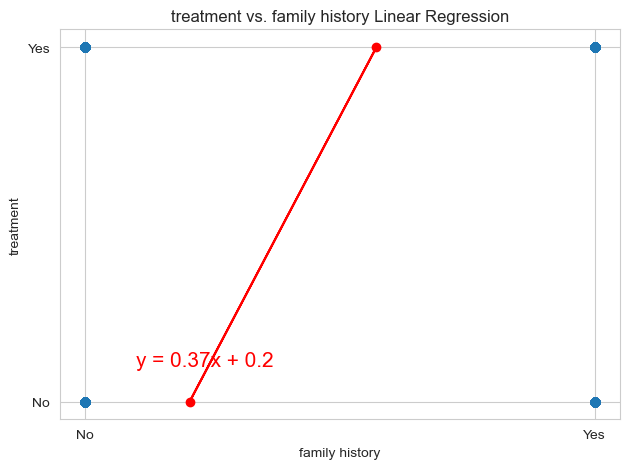

R-squared for family history vs. treatment: 0.14

 

Skipping plot for work interfere vs family history because R-squared is below threshold (0.06)
Skipping plot for family history vs work interfere because R-squared is below threshold (0.06)
Skipping plot for benefits vs family history because R-squared is below threshold (0.02)
Skipping plot for family history vs benefits because R-squared is below threshold (0.02)
Skipping plot for care options vs family history because R-squared is below threshold (0.01)
Skipping plot for family history vs care options because R-squared is below threshold (0.01)
Skipping plot for wellness program vs family history because R-squared is below threshold (0.00)
Skipping plot for family history vs wellness program because R-squared is below threshold (0.00)
Skipping plot for seek help vs family history because R-squared is below threshold (0.00)
Skipping plot for family history vs seek help because R-squared is below threshold (0.00)
Skipping plot for a

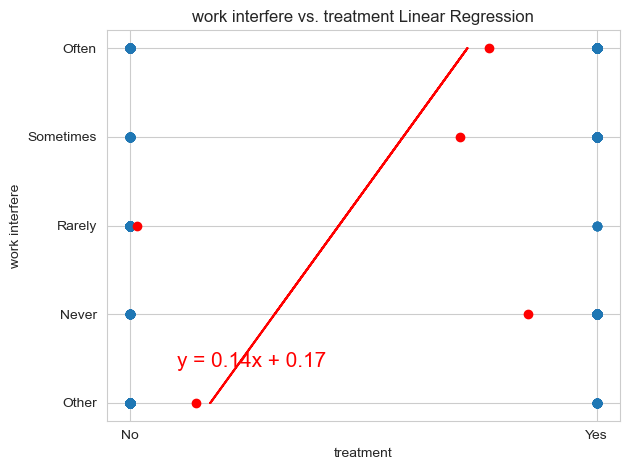

R-squared for treatment vs. work interfere: 0.17

 

Skipping plot for benefits vs treatment because R-squared is below threshold (0.05)
Skipping plot for treatment vs benefits because R-squared is below threshold (0.05)
Skipping plot for care options vs treatment because R-squared is below threshold (0.06)
Skipping plot for treatment vs care options because R-squared is below threshold (0.06)
Skipping plot for wellness program vs treatment because R-squared is below threshold (0.01)
Skipping plot for treatment vs wellness program because R-squared is below threshold (0.01)
Skipping plot for seek help vs treatment because R-squared is below threshold (0.01)
Skipping plot for treatment vs seek help because R-squared is below threshold (0.01)
Skipping plot for anonymity vs treatment because R-squared is below threshold (0.02)
Skipping plot for treatment vs anonymity because R-squared is below threshold (0.02)
Skipping plot for leave vs treatment because R-squared is below threshold (0.00

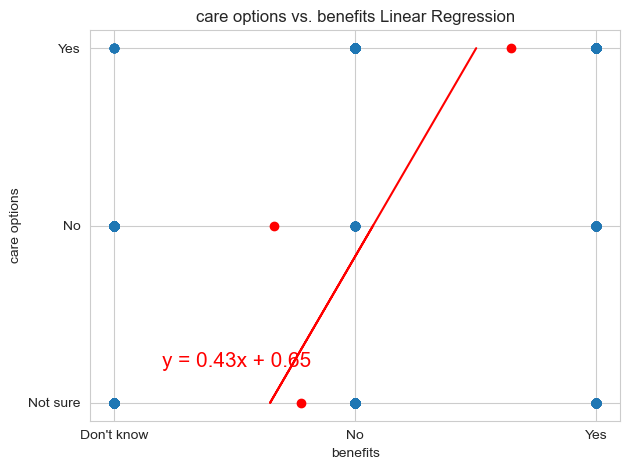

R-squared for benefits vs. care options: 0.20

 

Skipping plot for wellness program vs benefits because R-squared is below threshold (0.10)
Skipping plot for benefits vs wellness program because R-squared is below threshold (0.10)


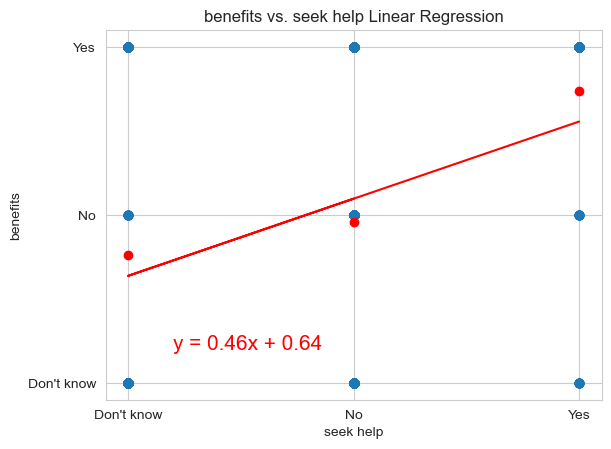

R-squared for benefits vs. seek help: 0.14

 

Skipping plot for anonymity vs benefits because R-squared is below threshold (0.11)
Skipping plot for benefits vs anonymity because R-squared is below threshold (0.11)
Skipping plot for leave vs benefits because R-squared is below threshold (0.00)
Skipping plot for benefits vs leave because R-squared is below threshold (0.00)
Skipping plot for mental health consequence vs benefits because R-squared is below threshold (0.00)
Skipping plot for benefits vs mental health consequence because R-squared is below threshold (0.00)
Skipping plot for physical health consequence vs benefits because R-squared is below threshold (0.00)
Skipping plot for benefits vs physical health consequence because R-squared is below threshold (0.00)
Skipping plot for coworkers vs benefits because R-squared is below threshold (0.00)
Skipping plot for benefits vs coworkers because R-squared is below threshold (0.00)
Skipping plot for supervisor vs benefits because R-sq

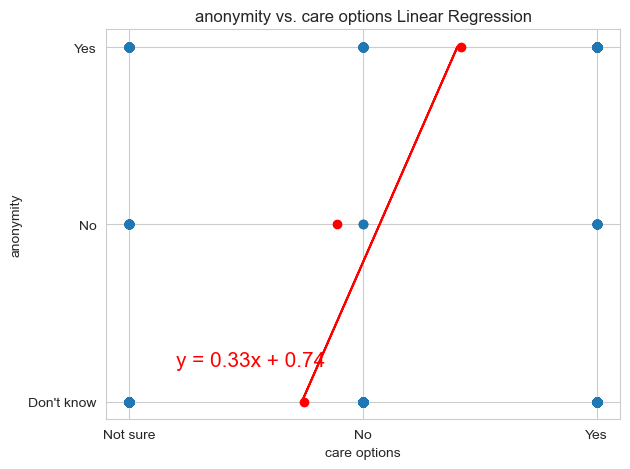

R-squared for care options vs. anonymity: 0.12

 

Skipping plot for leave vs care options because R-squared is below threshold (0.02)
Skipping plot for care options vs leave because R-squared is below threshold (0.02)
Skipping plot for mental health consequence vs care options because R-squared is below threshold (0.00)
Skipping plot for care options vs mental health consequence because R-squared is below threshold (0.00)
Skipping plot for physical health consequence vs care options because R-squared is below threshold (0.00)
Skipping plot for care options vs physical health consequence because R-squared is below threshold (0.00)
Skipping plot for coworkers vs care options because R-squared is below threshold (0.00)
Skipping plot for care options vs coworkers because R-squared is below threshold (0.00)
Skipping plot for supervisor vs care options because R-squared is below threshold (0.01)
Skipping plot for care options vs supervisor because R-squared is below threshold (0.01)
Skippin

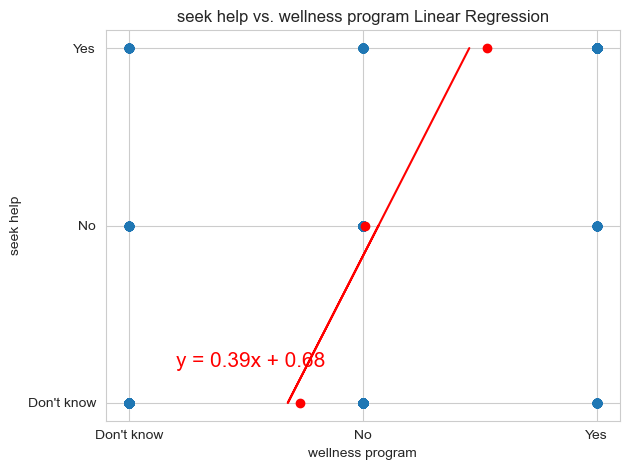

R-squared for wellness program vs. seek help: 0.22

 

Skipping plot for anonymity vs wellness program because R-squared is below threshold (0.05)
Skipping plot for wellness program vs anonymity because R-squared is below threshold (0.05)
Skipping plot for leave vs wellness program because R-squared is below threshold (0.01)
Skipping plot for wellness program vs leave because R-squared is below threshold (0.01)
Skipping plot for mental health consequence vs wellness program because R-squared is below threshold (0.00)
Skipping plot for wellness program vs mental health consequence because R-squared is below threshold (0.00)
Skipping plot for physical health consequence vs wellness program because R-squared is below threshold (0.00)
Skipping plot for wellness program vs physical health consequence because R-squared is below threshold (0.00)
Skipping plot for coworkers vs wellness program because R-squared is below threshold (0.00)
Skipping plot for wellness program vs coworkers because R

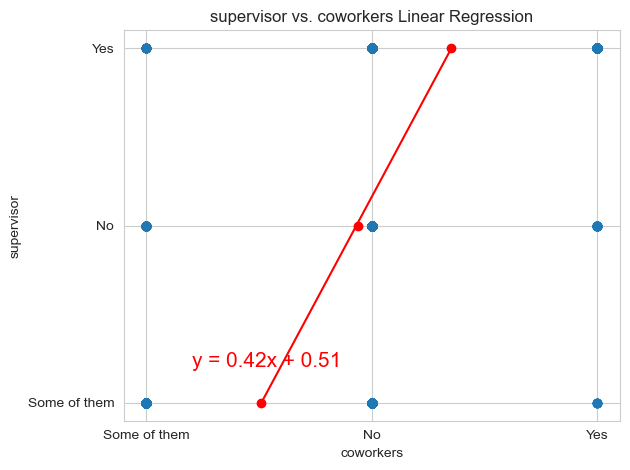

R-squared for coworkers vs. supervisor: 0.33

 

Skipping plot for mental health interview vs coworkers because R-squared is below threshold (0.02)
Skipping plot for coworkers vs mental health interview because R-squared is below threshold (0.02)
Skipping plot for physical health interview vs coworkers because R-squared is below threshold (0.00)
Skipping plot for coworkers vs physical health interview because R-squared is below threshold (0.00)
Skipping plot for mental vs physical vs coworkers because R-squared is below threshold (0.04)
Skipping plot for coworkers vs mental vs physical because R-squared is below threshold (0.04)
Skipping plot for obs consequence vs coworkers because R-squared is below threshold (0.00)
Skipping plot for coworkers vs obs consequence because R-squared is below threshold (0.00)
Skipping plot for mental health interview vs supervisor because R-squared is below threshold (0.04)
Skipping plot for supervisor vs mental health interview because R-squared is belo

In [3]:
### Create Regression Scatter Plots for all pairs of features (columns) where r^2 > 0.12 

from scipy.stats import linregress

def create_linear_regression_plot(x_col, y_col, df, plotted_pairs, print_r_squared=True, r_squared_threshold=0.0):
    # Check if this pair has already been plotted
    if (x_col, y_col) in plotted_pairs or (y_col, x_col) in plotted_pairs:
        return

    x_values = df[x_col]
    y_values = df[y_col]

    # Skip non-numeric columns
    if not x_values.dtype.kind in {'i', 'u', 'f'}:
        print(f"Skipping plot for {x_col} vs {y_col} due to non-numeric data in column {x_col}.")
        return
    if not y_values.dtype.kind in {'i', 'u', 'f'}:
        print(f"Skipping plot for {x_col} vs {y_col} due to non-numeric data in column {y_col}.")
        return

    # Skip constant columns
    if x_values.std() == 0 or y_values.std() == 0:
        print(f"Skipping plot for {x_col} vs {y_col} due to lack of variation in the data.")
        return

    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Calculate R-squared
    r_squared = rvalue ** 2 if not np.isnan(rvalue) else 0

    # Skip plot and printout if R-squared is below threshold
    if r_squared < r_squared_threshold:
        print(f"Skipping plot for {x_col} vs {y_col} because R-squared is below threshold ({r_squared:.2f})")
        return

    # Calculate the mean y-value for each unique x-value
    mean_y_values = df.groupby(x_col)[y_col].mean()

    # Adjust orientation based on standard deviation
    if abs(x_values.std()) < abs(y_values.std()):
        plt.figure()
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values, "r-")
        
        # Plot the red points representing the mean y-values for each x-value
        for x_val in mean_y_values.index:
            plt.plot(x_val, mean_y_values[x_val], 'ro')  # Red point for mean y-value

        x_min = x_values.min()
        x_range = x_values.max() - x_min
        y_min = y_values.min()
        y_range = y_values.max() - y_min
        plt.annotate(line_eq, (x_min + 0.1 * x_range, y_min + 0.1 * y_range), fontsize=15, color="red")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f"{y_col} vs. {x_col} Linear Regression")
        plt.grid(True)

        # Set x-axis tick labels for categorical variables
        if x_col in score_mappings:
            inv_x_mapping = {v: k for k, v in score_mappings[x_col].items()}
            plt.xticks(ticks=list(inv_x_mapping.keys()), labels=list(inv_x_mapping.values()))

        # Set y-axis tick labels for categorical variables
        if y_col in score_mappings:
            inv_y_mapping = {v: k for k, v in score_mappings[y_col].items()}
            plt.yticks(ticks=list(inv_y_mapping.keys()), labels=list(inv_y_mapping.values()))

        plt.show(block=True)
        plt.close()
    else:
        plt.figure()
        plt.scatter(y_values, x_values)
        plt.plot(regress_values, x_values, "r-")
        
        # Plot the red points representing the mean y-values for each x-value
        for x_val in mean_y_values.index:
            plt.plot(mean_y_values[x_val], x_val, 'ro')  # Red point for mean y-value

        y_min = y_values.min()
        y_range = y_values.max() - y_min
        x_min = x_values.min()
        x_range = x_values.max() - x_min
        plt.annotate(line_eq, (y_min + 0.1 * y_range, x_min + 0.1 * x_range), fontsize=15, color="red")
        plt.xlabel(y_col)
        plt.ylabel(x_col)
        plt.title(f"{x_col} vs. {y_col} Linear Regression")
        plt.grid(True)

        # Set y-axis tick labels for categorical variables
        if x_col in score_mappings:
            inv_x_mapping = {v: k for k, v in score_mappings[x_col].items()}
            plt.yticks(ticks=list(inv_x_mapping.keys()), labels=list(inv_x_mapping.values()))

        # Set x-axis tick labels for categorical variables
        if y_col in score_mappings:
            inv_y_mapping = {v: k for k, v in score_mappings[y_col].items()}
            plt.xticks(ticks=list(inv_y_mapping.keys()), labels=list(inv_y_mapping.values()))

        plt.tight_layout()
        plt.show(block=True)
        plt.close()

    # Add the pair to the set of plotted pairs
    plotted_pairs.add((x_col, y_col))

    # Print R-squared
    if print_r_squared:
        print(f"R-squared for {y_col} vs. {x_col}: {r_squared:.2f}")
        print('\n', '\n')

    return True  # Return True so we can print for the reverse direction

def analyze_and_plot_numeric(df, r_squared_threshold=0.0):
    try:
        numeric_df = df.select_dtypes(include=np.number)

        if numeric_df.empty:
            return  # Exit if no numeric columns

        columns = numeric_df.columns.tolist()
        n = len(columns)

        plotted_pairs = set()

        for i in range(n):
            for j in range(i + 1, n):  # Only consider unique pairs
                col1 = columns[i]
                col2 = columns[j]
                create_linear_regression_plot(col2, col1, numeric_df, plotted_pairs, True, r_squared_threshold)
                create_linear_regression_plot(col1, col2, numeric_df, plotted_pairs, False, r_squared_threshold)

    except Exception as e:
        print(f"Error in analyze_and_plot_numeric: {e}")
        import traceback
        traceback.print_exc()

analyze_and_plot_numeric(df, r_squared_threshold=0.12)


Sought Mental Health Treatment Rates by Wellness Program Discussion Includes Mental Health:


treatment,No,Yes
wellness program,,
Don't know,56.9%,43.1%
No,50.1%,49.9%
Yes,40.8%,59.2%


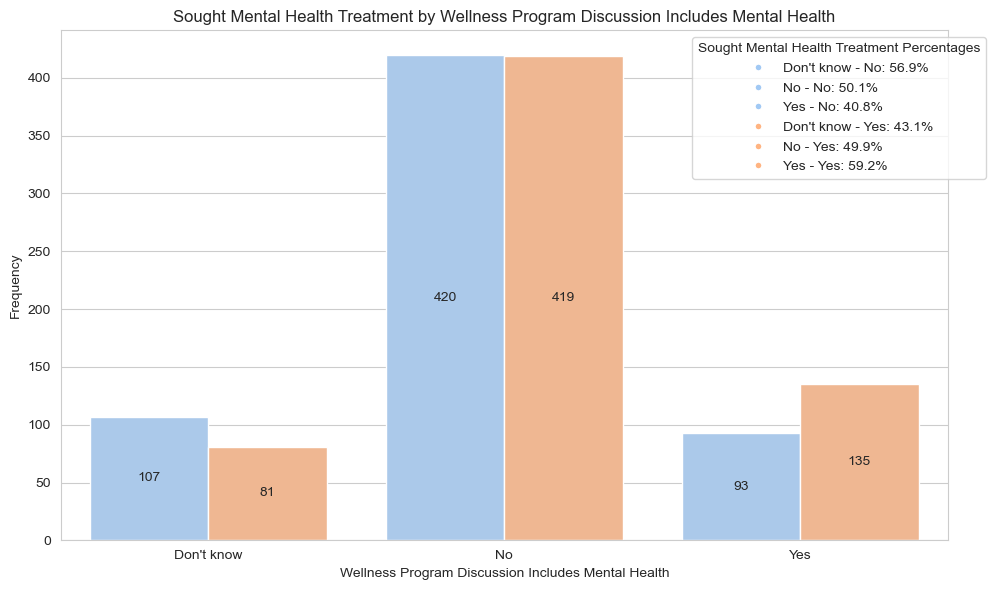

In [ ]:
### Detailed Analysis of Wellness Programs: Assess Specific Wellness Program Types and Their Effectiveness

# Filter data for relevant columns
wellness_df = data_df[['wellness program', 'treatment']].copy()

# Sought Mental Health Treatment percentages by Wellness Program Discussion Includes Mental Health
wellness_program_treatment = wellness_df.groupby('wellness program')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Map the values in wellness_program_treatment to percentages
wellness_program_treatment = wellness_program_treatment.apply(lambda x: x.apply(lambda val: f'{val:.1%}'))

# Print the Sought Mental Health Treatment rates by Wellness Program Discussion Includes Mental Health (for reference)
print("Sought Mental Health Treatment Rates by Wellness Program Discussion Includes Mental Health:")
display(wellness_program_treatment)

# Counterplot to see sought mental health treatment rates by Wellness Program Discussion Includes Mental Health
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='wellness program', hue='treatment', data=wellness_df, palette='pastel',
                   hue_order=['No', 'Yes'], order=['Don\'t know', 'No', 'Yes'])

plt.title("Sought Mental Health Treatment by Wellness Program Discussion Includes Mental Health")
plt.xlabel("Wellness Program Discussion Includes Mental Health")
plt.ylabel("Frequency")

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')

# Custom function to calculate percentages from wellness_program_treatment
def calculate_percentages(wellness_program, treatment):
    if wellness_program in wellness_program_treatment.index and treatment in wellness_program_treatment.columns:
        return wellness_program_treatment.loc[wellness_program, treatment]
    else:
        return 'N/A'

# Create a custom legend
legend_text = []
legend_colors = []
treatment_labels = wellness_program_treatment.columns
wellness_programs = wellness_program_treatment.index

for treatment in treatment_labels:
    for wellness_program in wellness_programs:
        percentage = calculate_percentages(wellness_program, treatment)
        legend_text.append(f'{wellness_program} - {treatment}: {percentage}')
        legend_colors.append(sns.color_palette("pastel")[0 if treatment == 'No' else 1])

legend_elements = [Line2D([0], [0], marker='o', color='w', label=text,
                          markerfacecolor=color, markersize=5)
                   for text, color in zip(legend_text, legend_colors)]

plt.legend(handles=legend_elements, title="Sought Mental Health Treatment Percentages",
           loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


Sought Mental Health Treatment Rates by Company Size:


treatment,No,Yes
number of employees,,
1-5,44.1%,55.9%
100-500,46.0%,54.0%
26-100,47.9%,52.1%
500-1000,55.0%,45.0%
6-25,55.9%,44.1%
More than 1000,48.2%,51.8%


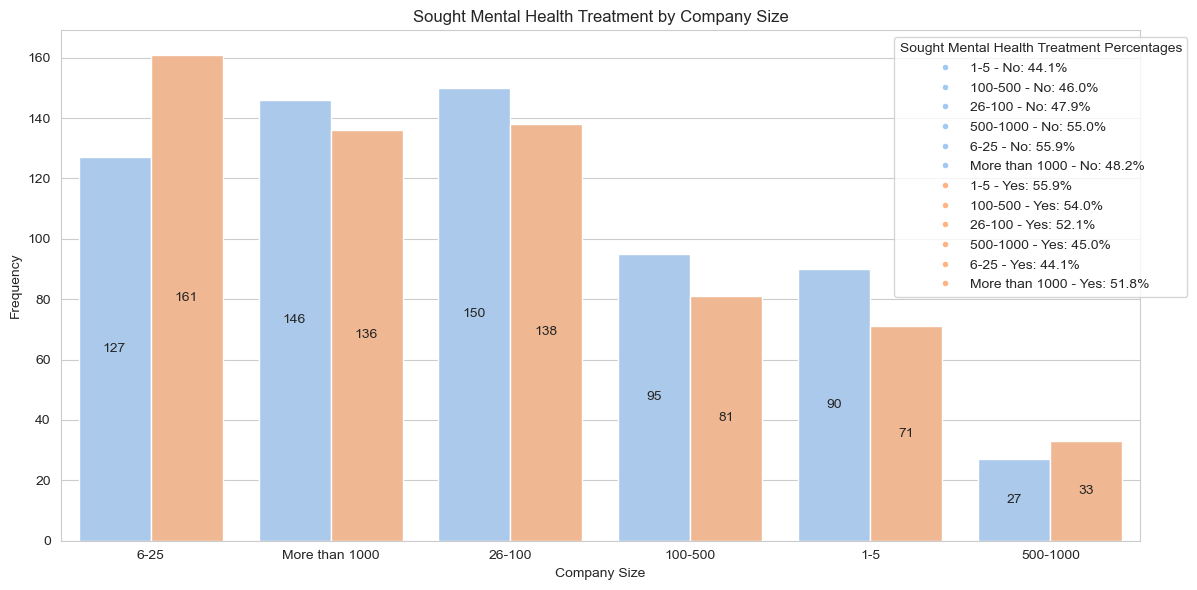

In [7]:
### In-depth Comparative Analysis: Explore Mental Health Outcomes by Company Size 

# Ensure 'company size' column is present
company_job_df = data_df[['number of employees', 'treatment', 'mental health consequence']].copy()

# Sought Mental Health Treatment percentages by company size
company_size_treatment = company_job_df.groupby('number of employees')['treatment'].value_counts(normalize=True).unstack()

# Map numeric values back to categorical strings for 'treatment'
treatment_mapping = {v: k for k, v in score_mappings['treatment'].items()}
company_size_treatment = company_size_treatment.rename(columns=treatment_mapping)

# Format the float values as percentages using apply
company_size_treatment = company_size_treatment.apply(lambda x: x.apply(lambda val: f'{val:.1%}'))

# Print the treatment rates by company size (for reference)
print("Sought Mental Health Treatment Rates by Company Size:")
display(company_size_treatment)

# Countplot for sought mental health treatment rates by company size
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='number of employees', hue='treatment', data=company_job_df, palette='pastel')
plt.title("Sought Mental Health Treatment by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Frequency")

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')

# Custom function to calculate percentages from company_size_treatment
def calculate_percentages(company_size, treatment):
    if company_size in company_size_treatment.index and treatment in company_size_treatment.columns:
        return company_size_treatment.loc[company_size, treatment]
    else:
        return 'N/A'

# Create a custom legend that includes both the sought mental health treatment (Yes/No) and the percentage for each company size
legend_text = []
legend_colors = []
treatment_labels = company_size_treatment.columns  # "Yes" and "No"
company_sizes = company_size_treatment.index  # The company sizes (e.g., 1-5, 100-500)

# Prepare the legend elements
for treatment in treatment_labels:
    for company_size in company_sizes:
        # Calculate the percentage for this combination of sought mental health treatment and company size
        percentage = calculate_percentages(company_size, treatment)
        
        # Add the text for the legend, formatted with percentages
        legend_text.append(f'{company_size} - {treatment}: {percentage}')
        legend_colors.append(sns.color_palette("pastel")[0 if treatment == 'No' else 1])  # Assign colors based on 'Yes'/'No'

# Create the legend elements with the percentages
legend_elements = [Line2D([0], [0], marker='o', color='w', label=text,
                          markerfacecolor=color, markersize=5)
                   for text, color in zip(legend_text, legend_colors)]

# Add the legend to the plot
plt.legend(handles=legend_elements, title="Sought Mental Health Treatment Percentages",
           loc='upper right', bbox_to_anchor=(1.05, 1))  # Adjust position if needed

plt.tight_layout()
plt.show()


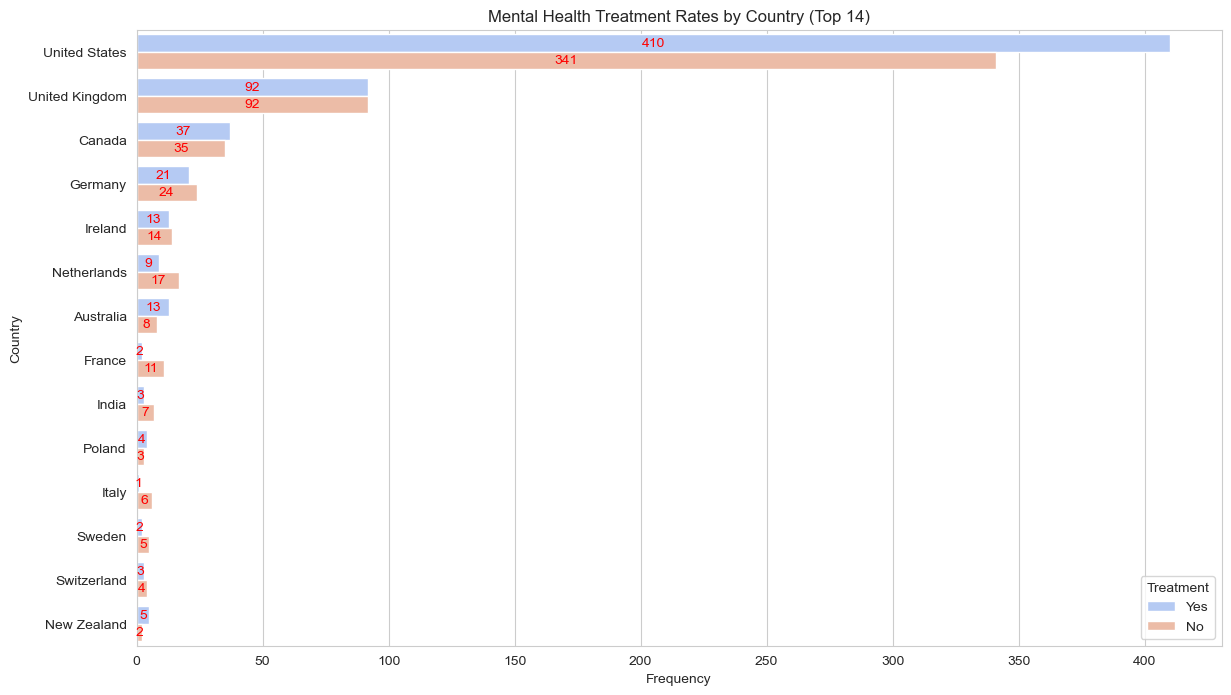

Sought Mental Health Treatment Rates by Country:


C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_121160\1580139287.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_treatment = country_treatment.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)


treatment,No,Yes
Country,,
Australia,38.1%,61.9%
Belgium,83.3%,16.7%
Brazil,66.7%,33.3%
Bulgaria,50.0%,50.0%
Canada,48.6%,51.4%
Finland,66.7%,33.3%
France,84.6%,15.4%
Germany,53.3%,46.7%
India,70.0%,30.0%


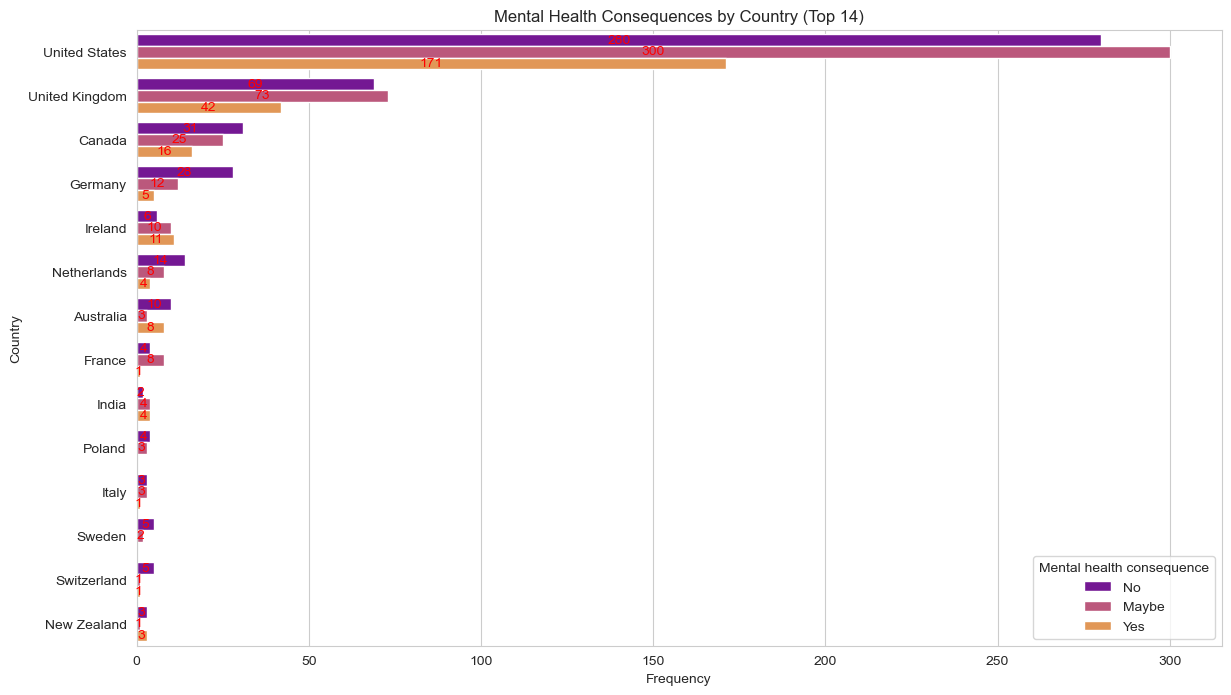


Expect Discussing Mental Health with Employer Will Have Negative Consequences by Country:


C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_121160\1580139287.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_mental_health_consequence = country_mental_health_consequence.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)


mental health consequence,Maybe,No,Yes
Country,,,
Australia,14.3%,47.6%,38.1%
Bulgaria,50.0%,25.0%,25.0%
Canada,34.7%,43.1%,22.2%
France,61.5%,30.8%,7.7%
Germany,26.7%,62.2%,11.1%
India,40.0%,20.0%,40.0%
Ireland,37.0%,22.2%,40.7%
Israel,60.0%,20.0%,20.0%
Italy,42.9%,42.9%,14.3%


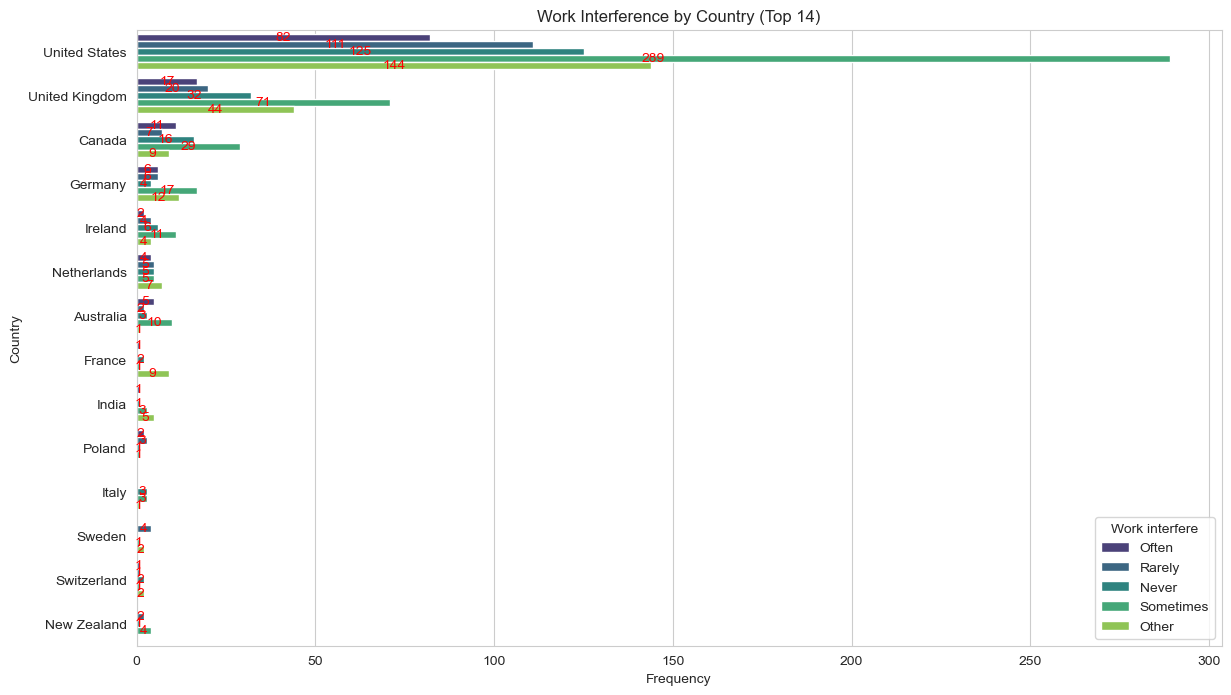


Work Interference by Country:


C:\Users\asg_a_1p8y6mm\AppData\Local\Temp\ipykernel_121160\1580139287.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_work_interfere = country_work_interfere.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)


work interfere,Never,Often,Other,Rarely,Sometimes
Country,,,,,
Australia,14.3%,23.8%,4.8%,9.5%,47.6%
Belgium,16.7%,16.7%,33.3%,16.7%,16.7%
Canada,22.2%,15.3%,12.5%,9.7%,40.3%
Germany,8.9%,13.3%,26.7%,13.3%,37.8%
Ireland,22.2%,7.4%,14.8%,14.8%,40.7%
Netherlands,19.2%,15.4%,26.9%,19.2%,19.2%
Switzerland,28.6%,14.3%,28.6%,14.3%,14.3%
United Kingdom,17.4%,9.2%,23.9%,10.9%,38.6%
United States,16.6%,10.9%,19.2%,14.8%,38.5%


In [11]:
### Country-Specific Analysis: Differences in Mental Health Outcomes and Workplace Factors by Country

# Data preprocessing and plotting function (No changes here)
country_df = data_df[['Country', 'treatment', 'mental health consequence', 'work interfere']].copy()

# Function to reverse the score mappings
def reverse_mapping(df, column, mappings): 
    """Reverse integer encoding to categorical strings for a given column."""
    inverse_mapping = {v: k for k, v in mappings[column].items()}
    df.loc[:, column] = df[column].map(inverse_mapping)
    return df

# Function to plot the top N countries for a given column with hue
def plot_top_n_countries(df, column, hue, title, palette, top_n=14):
    """Plots a countplot for the top N countries with centered value counts as labels."""
    top_countries = df['Country'].value_counts().nlargest(top_n).index
    filtered_df = df[df['Country'].isin(top_countries)]

    plt.figure(figsize=(14, 8))
    ax = sns.countplot(y='Country', hue=hue, data=filtered_df, palette=palette, order=top_countries)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Country")
    plt.legend(title=hue.capitalize())

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            x = p.get_x() + width / 2
            y = p.get_y() + p.get_height() / 2
            ax.text(x, y, '{:1.0f}'.format(width), ha="center", va="center", color='red')

    plt.show()


# Bar plot for sought mental health treatment rates by country (top 14)
plot_top_n_countries(country_df, 'Country', 'treatment', "Mental Health Treatment Rates by Country (Top 14)", 'coolwarm')

# Calculate sought mental health treatment percentages by country and format as percentage strings
country_treatment = country_df.groupby('Country')['treatment'].value_counts(normalize=True).unstack()
country_treatment = country_treatment.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)
country_treatment.dropna(inplace=True)
print("Sought Mental Health Treatment Rates by Country:")
display(country_treatment)  # Changed to print directly

# Barplot for Expect Discussing Mental Health with Employer Will Have Negative Consequences by country (top 14)
plot_top_n_countries(country_df, 'Country', 'mental health consequence', "Mental Health Consequences by Country (Top 14)", 'plasma')
# Calculate Expect Discussing Mental Health with Employer Will Have Negative Consequences percentages by country and format as percentage strings
country_mental_health_consequence = country_df.groupby('Country')['mental health consequence'].value_counts(normalize=True).unstack()
country_mental_health_consequence = country_mental_health_consequence.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)
country_mental_health_consequence.dropna(inplace=True)
print("\nExpect Discussing Mental Health with Employer Will Have Negative Consequences by Country:")
display(country_mental_health_consequence) # Changed to print directly

# Barplot for work interference by country (top 14)
plot_top_n_countries(country_df, 'Country', 'work interfere', "Work Interference by Country (Top 14)", 'viridis')

# Calculate work interference percentages by country and format as percentage strings
country_work_interfere = country_df.groupby('Country')['work interfere'].value_counts(normalize=True).unstack()
country_work_interfere = country_work_interfere.applymap(lambda x: '{:.1%}'.format(x) if pd.notna(x) else x)
country_work_interfere.dropna(inplace=True)
print("\nWork Interference by Country:")
display(country_work_interfere) # Changed to print directly

<Figure size 1200x800 with 0 Axes>

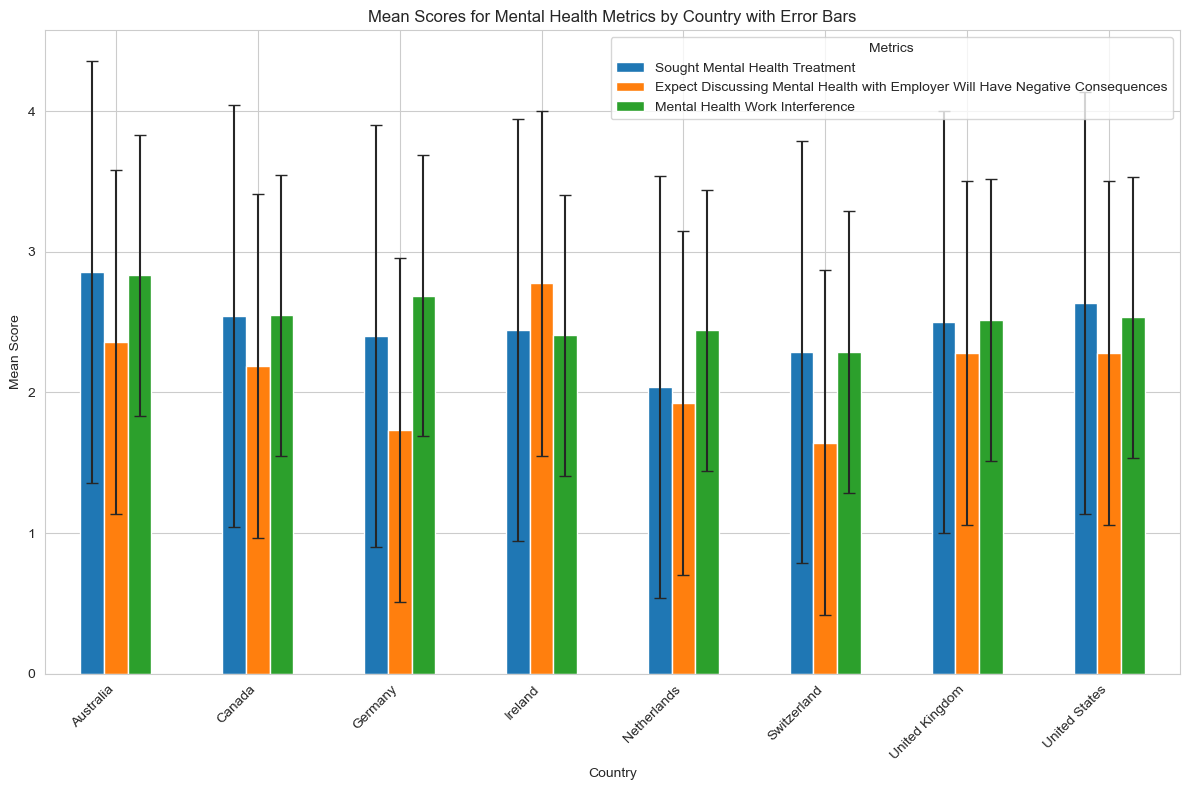

Mean Scores for Mental Health Metrics by Country (NaN rows dropped):


,Sought Mental Health Treatment,Expect Discussing Mental Health with Employer Will Have Negative Consequences,Mental Health Work Interference
Australia,2.857,2.3575,2.8330
Canada,2.542,2.1865,2.5495
Germany,2.401,1.7335,2.6885
Ireland,2.443,2.7750,2.4050
Netherlands,2.038,1.9240,2.4405
Switzerland,2.287,1.6435,2.2880
United Kingdom,2.500,2.2795,2.5155
United States,2.638,2.2825,2.5330


In [12]:
# Mean Scoring of Parameters by Country

# 1. Define Numerical Mappings

score_mappings = {
    'treatment': {'Yes': 4, 'No': 1},
    'mental health consequence': {'Yes': 4, 'No': 1, 'Maybe': 2.5},
    'work interfere': {'Other': 2.5, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4}
}

# 2. Function to Calculate Weighted Mean Score from Percentages

def calculate_weighted_mean(percentages, mappings):
    """Calculates weighted mean score from percentage strings using given mappings."""
    weighted_sum = 0
    total_percentage = 0
    for key, score in mappings.items():
        if key in percentages.index:
            percentage_value = float(percentages[key].rstrip('%')) / 100.0  # Convert percentage string to float
            weighted_sum += score * percentage_value
            total_percentage += percentage_value
    
    if total_percentage == 0:  # Avoid division by zero if all percentages are missing
        return None
    else:
        return weighted_sum

# 3. Calculate Mean Scores and Standard Deviations for Each DataFrame

def calculate_mean_and_std_from_percentages(df, mappings):
    """Calculates mean scores and standard deviations for each country in a DataFrame with percentage data."""
    mean_scores = {}
    std_devs = {}
    for country in df.index:
        mean_score = calculate_weighted_mean(df.loc[country], mappings)
        if mean_score is not None:  # Only add if a valid score is calculated
            mean_scores[country] = mean_score
            std_devs[country] = np.std([mappings[key] for key in df.loc[country].index if key in mappings])
    return pd.Series(mean_scores), pd.Series(std_devs)

treatment_mean_scores, treatment_stds = calculate_mean_and_std_from_percentages(country_treatment, score_mappings['treatment'])
consequence_mean_scores, consequence_stds = calculate_mean_and_std_from_percentages(country_mental_health_consequence, score_mappings['mental health consequence'])
interfere_mean_scores, interfere_stds = calculate_mean_and_std_from_percentages(country_work_interfere, score_mappings['work interfere'])

# 4. Combine into a Single DataFrame

mean_scores_df = pd.DataFrame({
    'Sought Mental Health Treatment': treatment_mean_scores,
    'Expect Discussing Mental Health with Employer Will Have Negative Consequences': consequence_mean_scores,
    'Mental Health Work Interference': interfere_mean_scores
})

std_devs_df = pd.DataFrame({
    'Sought Mental Health Treatment': treatment_stds,
    'Expect Discussing Mental Health with Employer Will Have Negative Consequences': consequence_stds,
    'Mental Health Work Interference': interfere_stds
})

# Drop rows with NaN values
mean_scores_df = mean_scores_df.dropna()
std_devs_df = std_devs_df.dropna()

# 5. Visualization

def plot_mean_scores_with_error_bars(df, stds, title):
    """Plots the mean scores for each country with error bars."""
    plt.figure(figsize=(12, 8))
    df.plot(kind='bar', yerr=stds, capsize=4, figsize=(12, 8))
    plt.title(title)
    plt.xlabel("Country")
    plt.ylabel("Mean Score")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Metrics")
    plt.tight_layout()
    plt.show()

plot_mean_scores_with_error_bars(mean_scores_df, std_devs_df, "Mean Scores for Mental Health Metrics by Country with Error Bars")

# 6. Displaying Mean Scores

print("Mean Scores for Mental Health Metrics by Country (NaN rows dropped):")
display(mean_scores_df)
